<div style="border-radius:10px; border:#00003B solid; padding: 15px; background-color:#CCCCFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#00003B'><center>Clustering algorithms + PCA</center></font></h3>


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

# Upload kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"avniuplabdhee","key":"374f4ce03d047c10de85ee1ba8d1995b"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

1. # <h4 style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#50508B; font-size:110%; text-align:left;padding: 10px; border-bottom: 2px solid #00003B">About dataset</h4>

HELP International plans to donate some money to countries in need.We have to categorize the countries using the given information and introduce the needy countries.


In [ ]:
!kaggle datasets download -d rohan0301/unsupervised-learning-on-country-data

  0% 0.00/5.21k [00:00<?, ?B/s]
100% 5.21k/5.21k [00:00<00:00, 9.35MB/s]


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!unzip /content/unsupervised-learning-on-country-data.zip -d /content/unsupervised-learning-on-country-data

Archive:  /content/unsupervised-learning-on-country-data.zip
  inflating: /content/unsupervised-learning-on-country-data/Country-data.csv  
  inflating: /content/unsupervised-learning-on-country-data/data-dictionary.csv  


In [ ]:
!pip install -r requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 89.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 4.7 MB/s eta 0:00:00
     ━━━

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#50508B; font-size:110%; text-align:left;padding: 10px; border-bottom: 2px solid #00003B">Install and import libraries</p>

In [ ]:
# To load the dataset and its visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import plotly_express as px
import pycountry_convert as pc
from geopy.geocoders import Nominatim
from mpl_toolkits.basemap import Basemap

# For preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.features import PCA as PCAVisualizer

# For data modeling
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, AgglomerativeClustering, MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from kneed import KneeLocator
from sklearn.model_selection import GridSearchCV

# Model performance
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

#warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
<ipython-input-10-dd34484e737c>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling

<h4 align="left"><font color='#00003B'>About the columns:</font></h4>

* __country:__ Name of the country.
* __child_mort:__ Death of children under 5 years of age per 1000 live births.
* __exports:__ Exports of goods and services per capita. Given as %age of the GDP per capita.
* __health:__ Total health spending per capita. Given as %age of GDP per capita.
* __imports:__ Imports of goods and services per capita. Given as %age of the GDP per capita.
* __Income:__ Net income per person
* __Inflation:__ The measurement of the annual growth rate of the Total GDP.
* __life_expec:__ The average number of years a new born child would live if the current mortality patterns are to rem...
* __total_fer:__ The number of children that would be born to each woman if the current age-fertility rates remain th...
* __gdpp:__ The GDP per capita. Calculated as the Total GDP divided by the total population.

In [ ]:
data = pd.read_csv('/content/unsupervised-learning-on-country-data/Country-data.csv')   # Load the country data from the specified CSV file into a Pandas DataFrame
data

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [ ]:
df = pd.DataFrame(data)   # Create a Pandas DataFrame using the loaded country data
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
import sqlite3

# Assuming your DataFrame is named 'data'
conn = sqlite3.connect('country_data.db')

# Replace 'your_table_name' with the desired table name
data.to_sql('countries_data', conn, index=False, if_exists='replace', dtype={
    'country': 'TEXT',
    'child_mort': 'REAL',
    'exports': 'REAL',
    'health': 'REAL',
    'imports': 'REAL',
    'income': 'INTEGER',
    'inflation': 'REAL',
    'life_expec': 'REAL',
    'total_fer': 'REAL',
    'gdpp': 'INTEGER'
})


167

# <h4 style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#50508B; font-size:110%; text-align:left;padding: 10px; border-bottom: 2px solid #00003B">Basic data analysis</h4>

In [ ]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# <h4 style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#50508B; font-size:110%; text-align:left;padding: 10px; border-bottom: 2px solid #00003B">Data Preprocessing</h4>

In [ ]:
# Calculate and organize information about missing values, NaN counts, and unique values in the DataFrame
null = data.isnull().sum().to_frame(name='isNull').T
na = data.isna().sum().to_frame(name='isNa').T
unique = data.nunique().to_frame(name='Unique').T


In [ ]:
df.duplicated().sum()

0

* Also, There is no duplicated values.

In [ ]:
# Define SQL queries to retrieve information
null_query = 'SELECT COUNT(*) AS null_count FROM countries_data WHERE country IS NULL;'
na_query = 'SELECT COUNT(*) AS nan_count FROM countries_data WHERE country IS  NULL OR country="NaN";'
unique_query = 'SELECT COUNT(DISTINCT country) AS unique_count FROM countries_data;'

# Execute queries and fetch results
null_result = conn.execute(null_query).fetchall()
na_result = conn.execute(na_query).fetchall()
unique_result = conn.execute(unique_query).fetchall()


In [ ]:
# Concatenate the calculated information into a summary DataFrame
info2 = pd.concat([null, na, unique])
info2

country  child_mort  exports  health  imports  income  inflation  \
isNull        0           0        0       0        0       0          0   
isNa          0           0        0       0        0       0          0   
Unique      167         139      147     147      151     156        156   

        life_expec  total_fer  gdpp  
isNull           0          0     0  
isNa             0          0     0  
Unique         127        138   157

In [ ]:
# Print the results
print("Number of NULL values in 'country' column:")
print(null_result[0][0])

print("\nNumber of non-NULL values in 'country' column:")
print(na_result[0][0])

print("\nNumber of unique values in 'country' column:")
print(unique_result[0][0])


Number of NULL values in 'country' column:
0

Number of non-NULL values in 'country' column:
0

Number of unique values in 'country' column:
167


## <h4 style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#50508B; font-size:110%; text-align:left;padding: 10px; border-bottom: 2px solid #00003B">Charts 📊</h4>

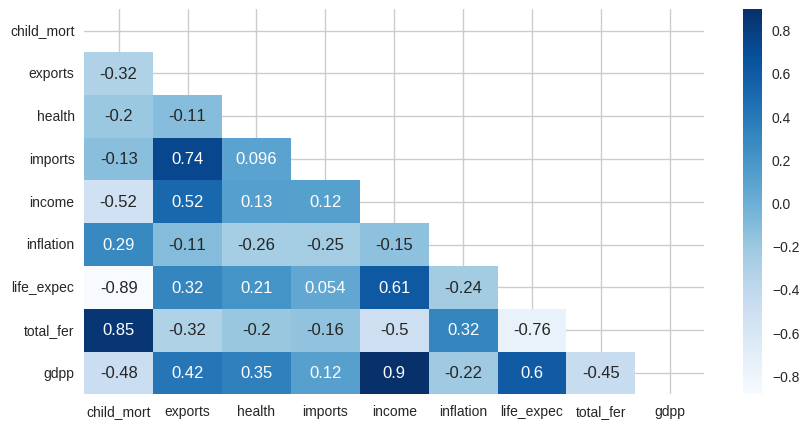

In [ ]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.drop(columns=['country'], axis=1).corr(), annot=True, cmap='Blues', mask=np.triu(np.ones_like(df.drop(columns=['country'], axis=1).corr())))
plt.show()

* __1:__ gdpp and income have almost a linear relationship.
* __2:__ total_fer and child_mort have almost a linear relationship.
* __3:__ imports and exports have almost a linear relationship.
* __4:__ life_expec and child_mort have almost a linear relationship.

Let's see these linear relationships on the scatter plot

In [ ]:
fig = px.scatter(df, x='gdpp', y='income', trendline="ols")
fig.update_layout(template = 'plotly_dark')
fig.show()


In [ ]:
fig = px.scatter(df, x='total_fer', y='child_mort', trendline="ols")
fig.update_layout(template = 'plotly_dark')
fig.show()

In [ ]:
fig = px.scatter(df, x='imports', y='exports', trendline="ols")
fig.update_layout(template = 'plotly_dark')
fig.show()

In [ ]:
fig = px.scatter(df, x='imports', y='exports', trendline="ols")
fig.update_layout(template = 'plotly_dark')
fig.show()

In [ ]:
for column in df.drop(columns=['country']).columns:
    fig = px.histogram(df, x=df[column])
    fig.update_layout(template = 'plotly_dark')
    fig.show()


The charts below show the ten countries with the highest and lowest values for each of the features.

In [ ]:
# First, we define two functions.

# This chart shows the top ten countries in each feature.
def pie_chart_highest(df, nam_feature):
    df2 = df.sort_values(by=nam_feature, ascending=False)
    fig = px.pie(df2[:10], values=nam_feature, names='country',title='Top 10 Countries with the Highest '+nam_feature, color_discrete_sequence=px.colors.sequential.Purp_r)
    fig.show()

# This chart shows the ten worst countries in each feature.
def pie_chart_lowest(df, nam_feature):
    df3 = df.sort_values(by=nam_feature, ascending=True)
    fig = px.pie(df3[:10], values=nam_feature, names='country',title='Top 10 Countries with the Lowest '+nam_feature, color_discrete_sequence=px.colors.sequential.Purples_r)
    fig.show()

In [ ]:
for column in df.drop(columns=['country']).columns:
    pie_chart_highest(df, column)
    pie_chart_lowest(df, column)

In [ ]:
# For numerical columns

numColumns = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

for column in numColumns:
    fig = px.box(df, x=df[column])
    fig.update_layout(template = 'plotly_dark')
    fig.show()

* Some of the data seem unusual. We decided to fix the gdpp on the y-axis and make plots.

In [ ]:
for column in df.drop(columns = ['country', 'gdpp']).columns:
    fig = px.scatter(df, x=df[column], y='gdpp')
    fig.update_layout(template = 'plotly_dark')
    fig.show()

<div style="border-radius:10px; border:#00003B solid; padding: 15px; background-color:#CCCCFF; font-size:100%; text-align:left">

<h3 align="left"><font color='#00003B'>💡 Note:</font></h3>

The dataset contains some number of outliers.
However, it's crucial to remember that outliers should not be removed arbitrarily. They should only be eliminated if there is a valid reason and solid evidence, as they may not necessarily be incorrect or irrelevant.

* __In this project, two cases are checked. In one case, the outliers were not considered, and in the next case, We considered them and then we chose the best case.__   Let's find these outliers.

In [ ]:
# child_mort < 200
df_f1 = df[df['child_mort'] < 200]
# exports < 150
df_f2 = df_f1[df_f1['exports'] < 150]
# health < 16
df_f3 = df_f2[df_f2['health'] < 16]
# imports < 120
df_f4 = df_f3[df_f3['imports'] < 120]
# income < 120000
df_f5 = df_f4[df_f4['income'] < 120000]
# inflation < 60
df_f6 = df_f5[df_f5['inflation'] < 60]
# life_expec > 40
df_f7 = df_f6[df_f6['life_expec'] > 40]
# total_fer < 7
df_f8 = df_f7[df_f7['total_fer'] < 7]
# gdpp < 80000
df_f = df_f8[df_f8['gdpp'] < 80000]
df_f

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[158 rows x 10 columns]

Now let's see the scatter plots without the outliers.

In [ ]:
for column in df_f.drop(columns = ['country', 'gdpp']).columns:
    fig = px.scatter(df_f, x=df_f[column], y='gdpp')
    fig.update_layout(template = 'plotly_dark')
    fig.show()

## <h4 style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#50508B; font-size:110%; text-align:left;padding: 10px; border-bottom: 2px solid #00003B">Distribution of data on world maps 🗺</h4>

To draw these plots, we need access to the __name of continents__ and the __latitude__ and __longitude__ of the countries in our dataset. __Add name of continents:__

We edited the names of some countries because they were written in abbreviation form and could not be identified by the 'pycountry' library.

In [ ]:
df2 = df.copy()

In [ ]:
df2['country'] = df2['country'].replace('Congo, Dem. Rep.', 'Democratic Republic of the Congo')
df2['country'] = df2['country'].replace('Congo, Rep.', 'Republic of the Congo')
df2['country'] = df2['country'].replace('''Cote d'Ivoire''', 'Ivory Coast')
df2['country'] = df2['country'].replace('Lao', 'Laos')
df2['country'] = df2['country'].replace('Macedonia, FYR', 'Macedonia')
df2['country'] = df2['country'].replace('Micronesia, Fed. Sts.', 'Federated States of Micronesia')
df2['country'] = df2['country'].replace('St. Vincent and the Grenadines', 'Saint Vincent and the Grenadines')
df2['country'] = df2['country'].replace('St. Vincent and the Grenadines', 'Saint Vincent and the Grenadines')
df2['country'] = df2['country'].replace('Timor-Leste', 'East Timor')

In [ ]:
# Adding a new column 'Continent' to the DataFrame
df2['Continent'] = np.NaN

# Iterating through each row in the DataFrame
for i in range(len(df2)):
    try:
        # Get country code using country name
        country_code = pc.country_name_to_country_alpha2(df2.country.iloc[i], cn_name_format="default")

        # Get continent name from country code
        df2['Continent'].iloc[i] = pc.country_alpha2_to_continent_code(country_code)

    except KeyError:
        # Handle cases where the country name is not recognized
        df2['Continent'].iloc[i] = 'Invalid'

# Note: This code adds a 'Continent' column to the DataFrame and populates it with

In [ ]:
df2[df2['Continent']=='Invalid']     #  This will result in a DataFrame containing only the rows where the continent couldn't be determined and was marked as 'Invalid' in the 'Continent' column.

country  child_mort  exports  health  imports  income  inflation  \
149  East Timor        62.6      2.2    9.12     27.8    1850       26.5   

     life_expec  total_fer  gdpp Continent  
149        71.1       6.23  3600   Invalid

East Timor, also known as Timor-Leste, is located in the continent of Asia.

In [ ]:
df2.loc[149,'Continent'] = 'Asia'    # Assigning the continent 'Asia' to the 'Continent' column for the row at index 149

First of all, let's see the share of each continent in our dataset.


In [ ]:

# the continent codes in the 'Continent' column ('SA', 'NA', 'AS', 'OC', 'EU', 'AF') will be replaced with their corresponding full continent names.
df2.Continent.replace ( {'SA': 'South America', 'NA': 'North America', 'AS': 'Asia','OC': 'Australia',
                      'EU': 'Europe', 'AF': 'Africa'},inplace=True)

In [ ]:
df_count = pd.DataFrame({'Value':df2['Continent'].value_counts().index, 'Count':df2['Continent'].value_counts().values})
fig = px.pie(df_count, values='Count', names='Value', color_discrete_sequence=px.colors.sequential.dense_r)
fig.show()

In [ ]:
# Creating new columns 'Longitude' and 'Latitude' for location information
df2["Longitude"] = np.NaN
df2["Latitude"] = np.NaN

# Using the Nominatim method from geopy.geocoders to find location coordinates
geolocator = Nominatim(user_agent="aa")
for i in range(len(df2)):
    try:
        # Constructing the location query using country and institution names
        Loc = df2.country.iloc[i] + "," + df2.Institution.iloc[i]

        # Getting address details using geolocator
        address = geolocator.geocode(Loc)

        # Updating Latitude and Longitude columns with location coordinates
        df2["Latitude"].iloc[i] = address.latitude
        df2["Longitude"].iloc[i] = address.longitude

    except:
        # If institution name is not available, using only country name
        Loc = df2.country.iloc[i]
        address = geolocator.geocode(Loc)

        # Updating Latitude and Longitude columns with location coordinates
        df2["Latitude"].iloc[i] = address.latitude
        df2["Longitude"].iloc[i] = address.longitude

Let's check the information of the new data frame:

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
 10  Continent   167 non-null    object 
 11  Longitude   167 non-null    float64
 12  Latitude    167 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 17.1+ KB


In [ ]:
# Calculate and organize information about missing values, NaN counts, and unique values in the DataFrame
null = df2.isnull().sum().to_frame(name='isNull').T
na = df2.isna().sum().to_frame(name='isNa').T
unique = df2.nunique().to_frame(name='Unique').T

# Concatenate the calculated information into a summary DataFrame
info2 = pd.concat([null, na, unique])
info2

country  child_mort  exports  health  imports  income  inflation  \
isNull        0           0        0       0        0       0          0   
isNa          0           0        0       0        0       0          0   
Unique      167         139      147     147      151     156        156   

        life_expec  total_fer  gdpp  Continent  Longitude  Latitude  
isNull           0          0     0          0          0         0  
isNa             0          0     0          0          0         0  
Unique         127        138   157          6        167       167

There is no missing values.


In [ ]:
df2.describe(include='all').T

count unique          top freq          mean           std  \
country       167    167  Afghanistan    1           NaN           NaN   
child_mort  167.0    NaN          NaN  NaN      38.27006     40.328931   
exports     167.0    NaN          NaN  NaN     41.108976      27.41201   
health      167.0    NaN          NaN  NaN      6.815689      2.746837   
imports     167.0    NaN          NaN  NaN     46.890215     24.209589   
income      167.0    NaN          NaN  NaN  17144.688623  19278.067698   
inflation   167.0    NaN          NaN  NaN      7.781832     10.570704   
life_expec  167.0    NaN          NaN  NaN     70.555689      8.893172   
total_fer   167.0    NaN          NaN  NaN      2.947964      1.513848   
gdpp        167.0    NaN          NaN  NaN  12964.155689  18328.704809   
Continent     167      6       Africa   47           NaN           NaN   
Longitude   167.0    NaN          NaN  NaN      8.793494     67.887941   
Latitude    167.0    NaN          NaN  NaN      18.72871     24.540007   

                   min        25%        50%        75%         max  
country            NaN        NaN        NaN        NaN         NaN  
child_mort         2.6       8.25       19.3       62.1       208.0  
exports          0.109       23.8       35.0      51.35       200.0  
health            1.81       4.92       6.32        8.6        17.9  
imports         0.0659       30.2       43.3      58.75       174.0  
income           609.0     3355.0     9960.0    22800.0    125000.0  
inflation        -4.21       1.81       5.39      10.75       104.0  
life_expec        32.1       65.3       73.1       76.8        82.8  
total_fer         1.15      1.795       2.41       3.88        7.49  
gdpp             231.0     1330.0     4660.0    14050.0    105000.0  
Continent          NaN        NaN        NaN        NaN         NaN  
Longitude  -175.202642 -56.048636  14.815333  43.263905  179.012274  
Latitude    -41.500083   2.275021  16.347124  40.304767   64.984182

__Finally, you can see the distribution of samples around the world:__


In [ ]:
# Create a scatter map using Plotly Express (`px.scatter_mapbox`) based on the `df2` DataFrame
# 'lat' parameter: Use the 'Latitude' column for latitude coordinates
# 'lon' parameter: Use the 'Longitude' column for longitude coordinates
# 'hover_name' parameter: Use the 'country' column for hover label text
# 'color' parameter: Use the 'country' column for color-coding the markers
# 'color_continuous_scale' parameter: Set the color scale for the markers
# 'hover_data' parameter: Additional columns to include in the hover tooltip
# 'zoom' parameter: Set the initial zoom level of the map
# 'mapbox_style' parameter: Set the initial map style (carto-positron)

fig = px.scatter_mapbox(df2, lat='Latitude', lon='Longitude', hover_name='country',color=df2["country"],
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        hover_data=["Continent", "health", "income", "gdpp"],zoom=5,
                        mapbox_style="carto-positron")
# Update the map style to 'open-street-map'
fig.update_layout(mapbox_style="open-street-map")
# Update the layout by setting margins to control spacing around the map
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# Display the scatter map
fig.show()

__Let's see the distribution of each column on a world map:__

In [ ]:
# First, we define a function.

# These plots show the distribution of each column on a world map
def choropleth(df, nam_feature):
    fig = px.choropleth(df,
                    locationmode='country names',
                    locations='country',
                    color=nam_feature,
                    color_continuous_scale = 'thermal',
                    title='Countries by '+nam_feature,
                   )

    fig.show()

In [ ]:
for column in df.drop(columns=['country']).columns:
    choropleth(df2, column)

# <h4 style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#50508B; font-size:110%; text-align:left;padding: 10px; border-bottom: 2px solid #00003B">Modeling</h4>

For modeling, it is necessary to remove the country column.

In [ ]:
# This data frame contains outliers.
df3 = df.drop(columns = ['country'], axis=1)
df3

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89   4460  
3         6.16   3530  
4         2.13  12200  
..         ...    ...  
162       3.50   2970  
163       2.47  13500  
164       1.95   1310  
165       4.67   1310  
166       5.40   1460  

[167 rows x 9 columns]

In [ ]:
# This data frame has no outlier.
df_fn = df_f.drop(columns = ['country'], axis=1)
df_fn

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89   4460  
3         6.16   3530  
4         2.13  12200  
..         ...    ...  
162       3.50   2970  
163       2.47  13500  
164       1.95   1310  
165       4.67   1310  
166       5.40   1460  

[158 rows x 9 columns]

## <h4 style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#50508B; font-size:110%; text-align:left;padding: 10px; border-bottom: 2px solid #00003B">Standardize</h4>

<div style="border-radius:10px; border:#00003B solid; padding: 15px; background-color:#CCCCFF; font-size:100%; text-align:left">
    
* The purpose of scaling is to ensure that all features are on the same scale, which can be important for certain machine learning algorithms. Scaling helps to prevent features with larger numerical ranges from dominating the influence on the algorithms, which can lead to biased results. By standardizing the features, you ensure that each feature contributes equally to the model's learning process.
    
* It's important to note that not all algorithms require scaling. For example, tree-based models like decision trees and random forests are not sensitive to the scale of features.
    
* If you're using __PCA__ to reduce dimensionality, scaling is necessary because PCA aims to find directions of maximum variance, and features with larger scales can disproportionately influence these directions.  

In [ ]:
# df3: A data Frame that contains outliers.
scaler = StandardScaler()                                              # Creates an instance of the StandardScaler class.
scaled_features = scaler.fit_transform(df3)                            # Scaling values.
scaled_dataframe = pd.DataFrame(scaled_features, columns=df3.columns)  # Create a new dataframe with scaled values.

In [ ]:
# df_f: A data Frame without outliers.
scaler2 = StandardScaler()                                                    # Creates an instance of the StandardScaler class.
scaled_features2 = scaler.fit_transform(df_fn)                                # Scaling values.
scaled_dataframe2= pd.DataFrame(scaled_features2, columns=df_fn.columns)      # Create a new dataframe with scaled values.

In [ ]:
scaled_dataframe

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3     -1.179234   2.128151 -0.516268  
4      0.704258  -0.541946 -0.041817  
..          ...        ...       ...  
162   -0.852161   0.365754 -0.546913  
163    0.546361  -0.316678  0.029323  
164    0.286958  -0.661206 -0.637754  
165   -0.344633   1.140944 -0.637754  
166   -2.092785   1.624609 -0.629546  

[167 rows x 9 columns]

In [ ]:
scaled_dataframe2

child_mort   exports    health   imports    income  inflation  \
0      1.420428 -1.420631  0.305469 -0.022342 -0.897090   0.271595   
1     -0.556955 -0.538475 -0.088664  0.172117 -0.354274  -0.380967   
2     -0.269482 -0.028785 -0.999379 -0.731853 -0.160504   1.149587   
3      2.194187  1.142523 -1.504481 -0.127455 -0.617200   1.980121   
4     -0.726215  0.319177 -0.287644  0.713448  0.243998  -0.783051   
..          ...       ...       ...       ...       ...        ...   
153   -0.218436  0.373087 -0.586113  0.387598 -0.809665  -0.627491   
154   -0.543522 -0.513970 -0.716216 -1.457132  0.074368   5.078143   
155   -0.376949  1.617907  0.022305  1.832899 -0.709192   0.622264   
156    0.509650 -0.440457 -0.612899 -0.574184 -0.709844   2.138318   
157    1.229675 -0.097397 -0.341215 -0.758131 -0.788135   0.872743   

     life_expec  total_fer      gdpp  
0     -1.736662   1.955935 -0.719970  
1      0.694803  -0.882583 -0.482608  
2      0.718996  -0.038516 -0.457778  
3     -1.264886   2.187373 -0.520189  
4      0.755287  -0.555847  0.061640  
..          ...        ...       ...  
153   -0.914077   0.376711 -0.557769  
154    0.585931  -0.324409  0.148881  
155    0.307704  -0.678373 -0.669169  
156   -0.369719   1.173130 -0.669169  
157   -2.244730   1.670041 -0.659103  

[158 rows x 9 columns]

## <h4 style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#50508B; font-size:110%; text-align:left;padding: 10px; border-bottom: 2px solid #00003B">PCA</h4>

<div style="border-radius:10px; border:#00003B solid; padding: 15px; background-color:#CCCCFF; font-size:100%; text-align:left">
    
PCA, or Principal Component Analysis, is a dimensionality reduction technique commonly used in machine learning and statistics. It is used to transform a high-dimensional dataset into a lower-dimensional space while retaining as much variance (information) as possible. The lower-dimensional representation obtained through PCA can help simplify the data, remove noise, and improve the efficiency of subsequent machine learning algorithms.
    
__Here's how PCA works:__
    
* __Variance and Orthogonality:__ PCA identifies the directions (principal components) in the original feature space along which the data varies the most (has the highest variance). These principal components are orthogonal to each other, meaning they are uncorrelated.

* __Dimensionality Reduction:__ The idea is to project the original data onto a new coordinate system formed by the principal components. The first principal component captures the most variance, the second principal component captures the second most variance (while being orthogonal to the first), and so on. By choosing a subset of these components, you can achieve dimensionality reduction.

* __Explained Variance:__ When you choose a subset of principal components, you retain a certain percentage of the total variance in the original data. This concept is important because it allows you to decide how much information you want to retain in the reduced-dimensional representation.
    
__Applications:__ PCA is often used for various purposes:

* __Dimensionality Reduction:__ Reduce the number of features in a dataset while preserving as much information as possible.
* __Data Visualization:__ Project high-dimensional data into a 2D or 3D space for visualization purposes.
* __Noise Reduction:__ By focusing on the principal components with the highest variance, you can reduce the impact of noise in the data.
* __Data Preprocessing:__ PCA can be used to preprocess data before applying machine learning algorithms to improve their performance.

It's important to note that while PCA is a powerful technique, it doesn't necessarily lead to interpretable features. The new dimensions (principal components) might not directly correspond to any meaningful physical or semantic attributes of the data.

__Here's a simplified example:__ Imagine you have a dataset with multiple features that describe a person's physical attributes (height, weight, shoe size, etc.). Using PCA, you can find new dimensions that capture the most variation among these attributes. The first principal component might be a combination of all attributes that represents overall body size, the second might represent limb proportions, and so on.

<div style="border-radius:10px; border:#00003B solid; padding: 15px; background-color:#CCCCFF; font-size:100%; text-align:left">

<h3 align="left"><font color='#00003B'>💡 Note:</font></h3>

Overall we can use PCA when the variables are strongly correlated, but if the relationship between the variables is weak, PCA does not work.

__Finding the best number of components:__

Text(0, 0.5, 'cumulative explained variance')

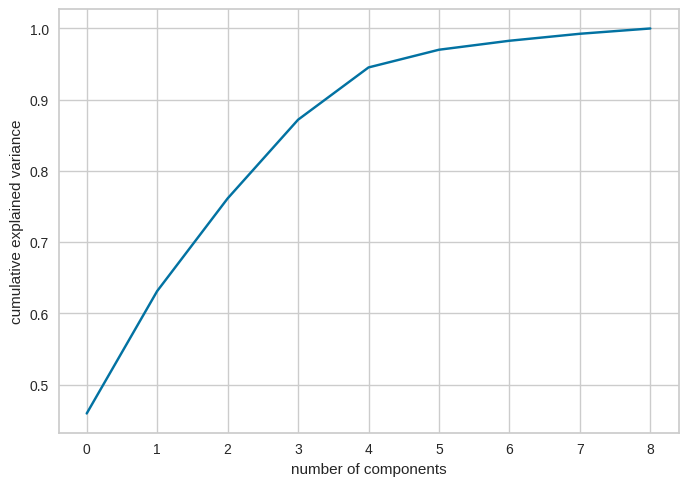

In [ ]:
# Considering outliers.
pca = PCA()                                                            # Import the PCA class from the scikit-learn library and create an instance with 3 components.
pca.fit(scaled_dataframe)                                              # Fit the PCA model to the scaled data in scaled_dataframe.
# Plotting the cumulative explained variance to visualize the contribution of each principal component
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

__We decided to use three as number of components in PCA.__


Text(0, 0.5, 'cumulative explained variance')

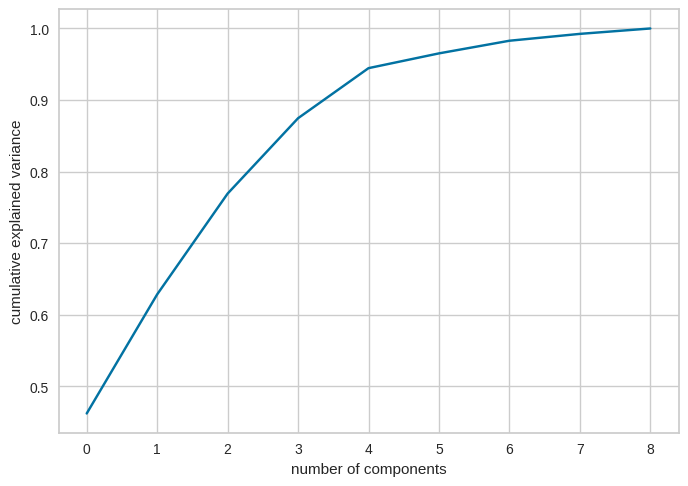

In [ ]:
# Without considering outliers.
pca2 = PCA()                                                            # Import the PCA class from the scikit-learn library and create an instance with 3 components.
pca2.fit(scaled_dataframe2)                                              # Fit the PCA model to the scaled data in scaled_dataframe.
# Plotting the cumulative explained variance to visualize the contribution of each principal component
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# Considering outliers.
pca = PCA(n_components=3)                                      # Import the PCA class from the scikit-learn library and create an instance with 3 components
pca.fit(scaled_dataframe)                                      # Fit the PCA model to the scaled data in scaled_dataframe
data_pca = pca.transform(scaled_dataframe)                     # Transform the scaled data into its principal components
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3']) # Create a new DataFrame df_pca to store the principal components with appropriate column names
df_pca

PC1       PC2       PC3
0   -2.913025  0.095621 -0.718118
1    0.429911 -0.588156 -0.333486
2   -0.285225 -0.455174  1.221505
3   -2.932423  1.695555  1.525044
4    1.033576  0.136659 -0.225721
..        ...       ...       ...
162 -0.820631  0.639570 -0.389923
163 -0.551036 -1.233886  3.101350
164  0.498524  1.390744 -0.238526
165 -1.887451 -0.109453  1.109752
166 -2.864064  0.485998  0.223167

[167 rows x 3 columns]

In [ ]:
# Without considering outliers.
pca2 = PCA(n_components=3)                                      # Import the PCA class from the scikit-learn library and create an instance with 3 components
pca2.fit(scaled_dataframe2)                                      # Fit the PCA model to the scaled data in scaled_dataframe
data_pca2 = pca2.transform(scaled_dataframe2)                     # Transform the scaled data into its principal components
df_pca2 = pd.DataFrame(data_pca2, columns=['PC1', 'PC2', 'PC3']) # Create a new DataFrame df_pca to store the principal components with appropriate column names
df_pca2

PC1       PC2       PC3
0   -3.157346 -0.186172 -1.142797
1    0.523170 -0.163654 -0.227992
2   -0.276443 -0.832019  1.486766
3   -3.267228  0.767681  2.026595
4    1.233904  0.649348  0.024260
..        ...       ...       ...
153 -0.870380  0.984045 -0.023983
154 -0.673632 -2.581426  3.377453
155  0.425853  2.248373  0.774712
156 -2.107043 -0.767815  1.247374
157 -3.100884 -0.073605  0.243980

[158 rows x 3 columns]

## <h4 style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#50508B; font-size:110%; text-align:left;padding: 10px; border-bottom: 2px solid #00003B">1.Kmeans</h4>

<div style="border-radius:10px; border:#00003B solid; padding: 15px; background-color:#CCCCFF; font-size:100%; text-align:left">
    
__How does the K-Means Algorithm Work?__

* __Initialization:__ Choose the number of clusters, K, that you want to divide the data into. Also, initialize K points randomly as the initial centroids of these clusters.

* __Assignment:__ For each data point, calculate its distance from each of the K centroids. Assign the data point to the cluster whose centroid it is closest to. This forms K clusters.

* __Update Centroids:__ Recalculate the centroids of the clusters by taking the mean of all the data points assigned to each cluster. These new centroids represent the center of each cluster.

* __Iteration:__ Repeat steps 2 and 3 until either a predetermined number of iterations is reached or until the centroids no longer change significantly (convergence). This ensures that the clusters and centroids are refined iteratively.

Set some initial values:

In [ ]:
kmeans_set = {"init":"random", "n_init":10,"max_iter":300,"random_state":42}

<div style="border-radius:10px; border:#00003B solid; padding: 15px; background-color:#CCCCFF; font-size:100%; text-align:left">
    
__Let's break down each parameter:__
    
__init:__ This parameter determines the method used to initialize the centroids before clustering. In this case, "random" means that the initial cluster centroids will be randomly chosen from the data points. There are other options available, such as "k-means++" which is a smarter initialization that tends to result in better clustering in practice.

__n_init:__ KMeans is a randomized algorithm, and it can converge to different solutions depending on the initial placement of centroids. To mitigate this randomness, the algorithm runs n_init times with different initializations and returns the best result. In this case, n_init=10 means that the algorithm will run 10 times with different random initializations and select the best clustering result from these runs.

__max_iter:__ This parameter determines the maximum number of iterations the KMeans algorithm will run for a single initialization. The algorithm tries to converge and optimize the cluster centroids within these iterations. If convergence is not reached within max_iter, the algorithm stops, even if it has not yet found a perfect clustering solution.

__random_state:__ This parameter is used to seed the random number generator. It ensures reproducibility of results so that if you run the KMeans algorithm with the same random_state value, you should get the same clustering result each time. Using a fixed random_state is useful for debugging and ensuring consistency when comparing different runs or experiments.

__Finding The optimal number of clusters:__


<div style="border-radius:10px; border:#00003B solid; padding: 15px; background-color:#CCCCFF; font-size:100%; text-align:left">
    
__1. Elbow Method:__ The idea behind the Elbow Method is to plot the explained variation as a function of the number of clusters and look for an "elbow point" where the rate of decrease in explained variation slows down, resembling an elbow. This point is often considered a reasonable estimate for the appropriate number of clusters.
    
__Inertia:__ Inertia is calculated by summing the squared distances between each data point and the centroid of its assigned cluster.

In [ ]:
inertias = []                                    # Initialize a list to store the inertias
for k in range(1, 11):                           # Loop through different values of k (number of clusters)
    # Create a KMeans instance with k clusters and other settings from kmeans_set dictionary
    kmeans = KMeans(n_clusters=k, **kmeans_set)  # The ** syntax is used to unpack the dictionary.
    kmeans.fit(df_pca)                           # Fit the KMeans model to the scaled data
    inertias.append(kmeans.inertia_)             # Append the inertia (within-clu

In [ ]:
k = KneeLocator(range(1, 11), inertias, curve='convex', direction='decreasing')    # Use the KneeLocator to find the elbow point in the inertia plot
print("Optimal number of clusters:", k.elbow)                                      # Print the optimal number of clusters (elbow point)

Optimal number of clusters: 3


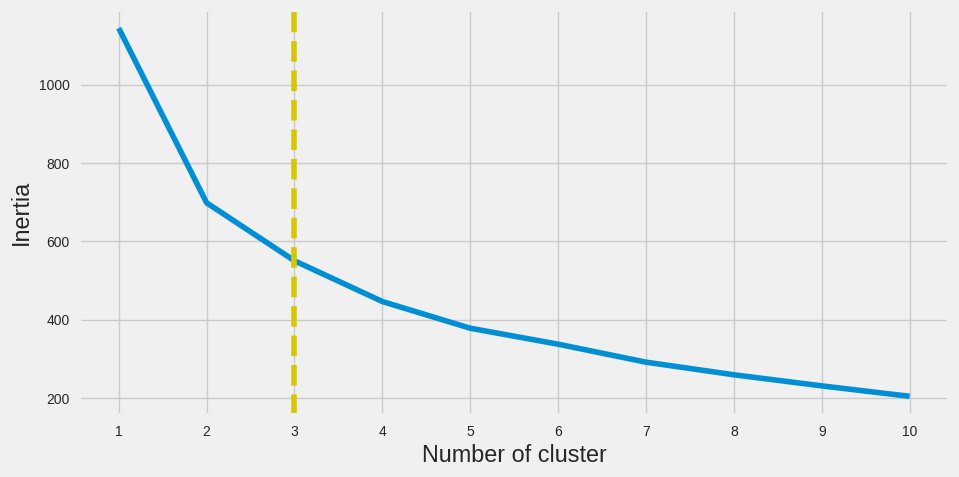

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 5))
plt.plot(range(1, 11), inertias)
plt.xticks(range(1, 11))
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.axvline(x=k.elbow, color='y', label="anxline - full height", ls='--')
plt.show()

* The best value of k using this method is equal to three.

<div style="border-radius:10px; border:#00003B solid; padding: 15px; background-color:#CCCCFF; font-size:100%; text-align:left">
    
__2. Silhouette coefficient:__The silhouette coefficient is a metric used to evaluate the quality of clustering in a dataset. It measures how well each data point fits into its assigned cluster by considering both its proximity to its own cluster and its distance to neighboring clusters. The silhouette coefficient ranges from -1 to 1, with higher values indicating better cluster quality. By calculating the average silhouette coefficient for different values of k (the number of clusters) and choosing the value that maximizes this metric, you can determine the optimal number of clusters for your clustering algorithm.
    
The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b).

In [ ]:
# Calculate Silhouette Coefficients for different numbers of clusters
silhouette_coefficients = []                          # List to hold the silhouette coefficients for each k
for k in range(2, 11):                                # Iterate through a range of cluster counts, starting from 2
    kmeans = KMeans(n_clusters=k, **kmeans_set)       # Create a KMeans instance with k clusters
    kmeans.fit(df_pca)                                # Fit KMeans on the PCA-transformed data
    score = silhouette_score(df_pca, kmeans.labels_)  # Calculate the silhouette score for the current clustering
    silhouette_coefficients.append(score)             # Store the silhouette score in the list

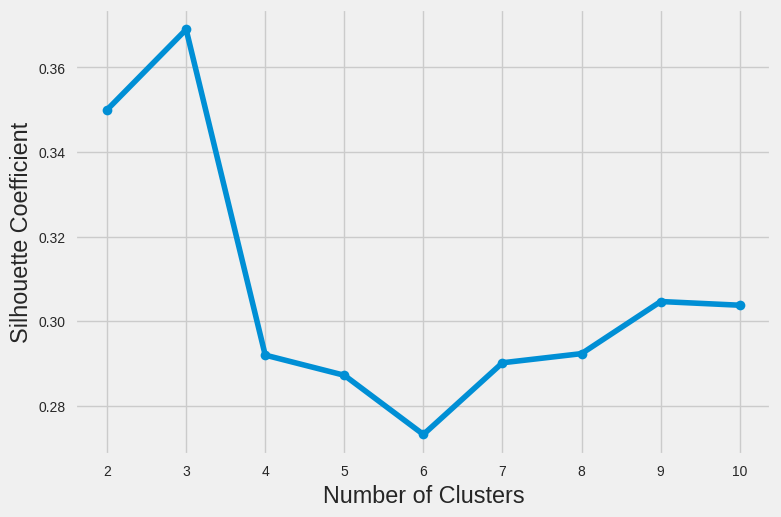

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients, marker='o')
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

* The best value of k using this method is equal to three.

<div style="border-radius:10px; border:#00003B solid; padding: 15px; background-color:#CCCCFF; font-size:100%; text-align:left">

__3. Calinski-Harabasz Index__ Is another metric used to evaluate the quality of clusters in a clustering algorithm. Similar to the Silhouette Coefficient, it helps assess the separation and compactness of clusters. The Calinski-Harabasz Index aims to maximize the ratio of between-cluster variance to within-cluster variance, indicating well-defined and well-separated clusters.

The index is calculated using the following formula:  
Calinski-Harabasz Index = (Between-Cluster Variance) / (Within-Cluster Variance) * (Number of Data Points - Number of Clusters) / (Number of Clusters - 1)

In [ ]:
# Calculate Calinski-Harabasz Index for different numbers of clusters
calinski_Harabasz_index = []   # List to hold the Calinski-Harabasz indices for each k
for k in range(2, 11):          # Iterate through a range of cluster counts, starting from 2
    kmeans = KMeans(n_clusters=k, **kmeans_set)  # Create a KMeans instance with k clusters
    kmeans.fit(df_pca)           # Fit KMeans on the PCA-transformed data
    score = calinski_harabasz_score(df_pca, kmeans.labels_)  # Calculate the Calinski-Harabasz score for the current clustering
    calinski_Harabasz_index.append(score)       # Store the score in the list

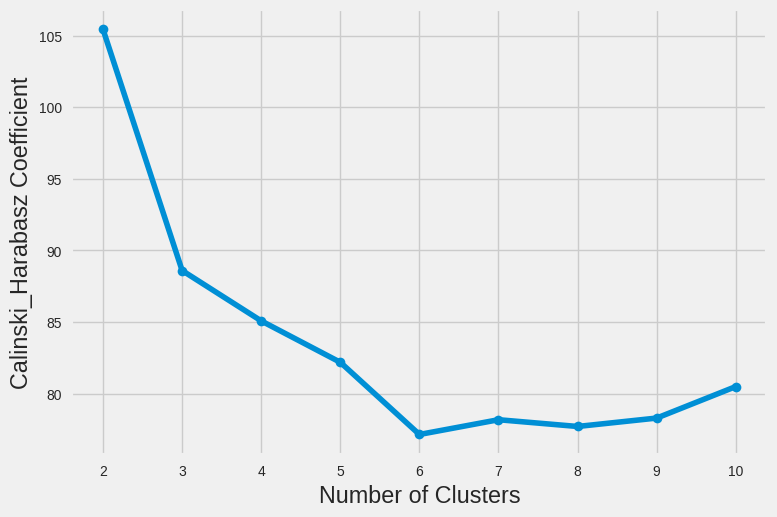

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), calinski_Harabasz_index, marker='o')
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski_Harabasz Coefficient")
plt.show()

* The best value of k using this method is equal to two.

<div style="border-radius:10px; border:#00003B solid; padding: 15px; background-color:#CCCCFF; font-size:100%; text-align:left">

__Davies-Bouldin Index:__ The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

__The minimum score is zero, with lower values indicating better clustering.__

__According to the results, we consider the number of clusters equal to 3.__

__Prediction1__

In [ ]:
kmeans = KMeans(n_clusters=3, **kmeans_set)                      # Implement kmeans for n_clusters=3.
kmeans.fit(df_pca)
pred1 = kmeans.labels_                                           # Store the cluster labels assigned by K-means.
centroids = kmeans.cluster_centers_                              # centroids holds the center points of the clusters.
centroidsDf = pd.DataFrame(centroids, columns=df_pca.columns)    # Save the result in the dataframe
centroidsDf

PC1       PC2       PC3
0  5.460225  5.432473  0.211648
1 -1.791537  0.252688  0.042046
2  1.325670 -0.396056 -0.042567

In [ ]:
# Create a copy of the PCA-transformed data with predicted cluster labels
df_pca_copy = df_pca.copy()           # Create a copy of the PCA-transformed data
df_pca_copy['KMeans_pred'] = pred1    # Add a new column 'KMeans_pred' containing the predicted cluster labels
df_pca_copy                           # Return the modified DataFrame with cluster labels

PC1       PC2       PC3  KMeans_pred
0   -2.913025  0.095621 -0.718118            1
1    0.429911 -0.588156 -0.333486            2
2   -0.285225 -0.455174  1.221505            1
3   -2.932423  1.695555  1.525044            1
4    1.033576  0.136659 -0.225721            2
..        ...       ...       ...          ...
162 -0.820631  0.639570 -0.389923            1
163 -0.551036 -1.233886  3.101350            1
164  0.498524  1.390744 -0.238526            2
165 -1.887451 -0.109453  1.109752            1
166 -2.864064  0.485998  0.223167            1

[167 rows x 4 columns]

__Performance1__

For this part, we first define a function so that we can use it in the evaluation of the next models:

In [ ]:
def performance(df, labels):
    silhoutteScore = silhouette_score(df, labels)
    calinskiScore = calinski_harabasz_score(df, labels)
    dunnIndex = davies_bouldin_score(df, labels)        # It's explained in the following.
    return silhoutteScore, calinskiScore, dunnIndex

In [ ]:
km_silhoutteScore, km_calinskiScore, km_dunnIndex = performance(df_pca, kmeans.labels_)
print('km_silhoutteScore', km_silhoutteScore)
print('km_calinskiScore', km_calinskiScore)
print('km_dunnIndex', km_dunnIndex)

km_silhoutteScore 0.36897078470659256
km_calinskiScore 88.59195321118905
km_dunnIndex 0.8395038419141594


<div style="border-radius:10px; border:#00003B solid; padding: 15px; background-color:#CCCCFF; font-size:100%; text-align:left">

__Davies-Bouldin Index:__ The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

__The minimum score is zero, with lower values indicating better clustering.__

__Visualization1__

In [ ]:
df_count = pd.DataFrame({'Cluster':df_pca_copy['KMeans_pred'].value_counts().index, 'Count':df_pca_copy['KMeans_pred'].value_counts().values})
plt = px.pie(df_count, values='Count', names='Cluster', title='Percent of each clusters in dataset', color_discrete_sequence=px.colors.sequential.Purp_r)
plt.show()

* Most of the data belong to cluster number two.

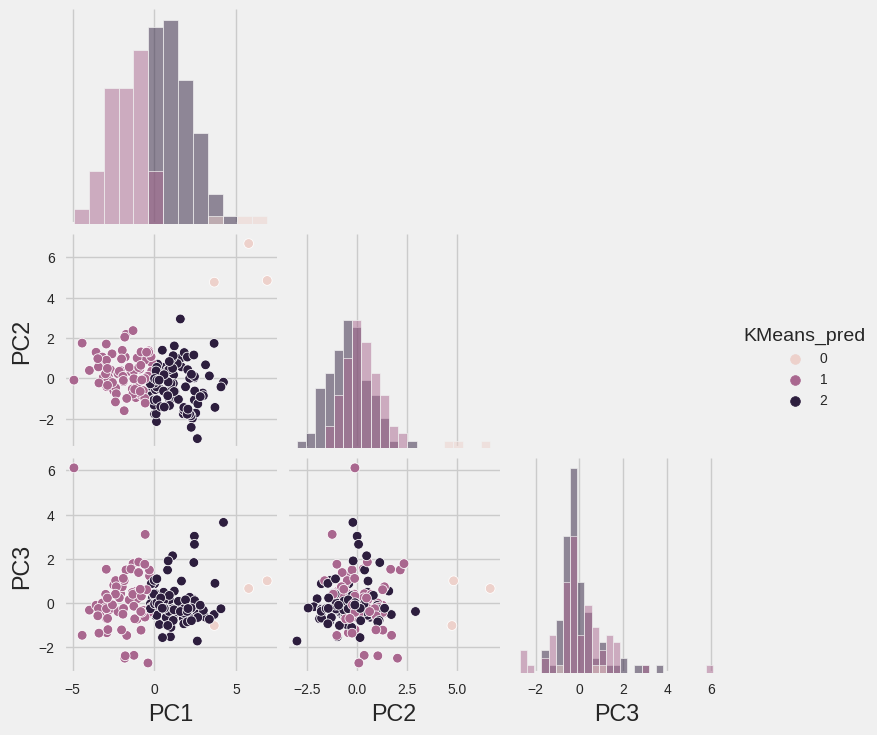

In [ ]:
sns.pairplot(df_pca_copy[df_pca_copy.columns], hue='KMeans_pred', corner=True, diag_kind="hist")

* This plot give a good view of the data distribution according to their labels.

## <h4 style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#50508B; font-size:110%; text-align:left;padding: 10px; border-bottom: 2px solid #00003B">2.Mini Batch KMeans</h4>

<div style="border-radius:10px; border:#00003B solid; padding: 15px; background-color:#CCCCFF; font-size:100%; text-align:left">
    
Mini Batch KMeans is an optimization of the traditional KMeans clustering algorithm that aims to improve its efficiency, especially when dealing with large datasets.
    
__Here's how the Mini Batch KMeans algorithm works:__
    
* __Initialization:__ Initialize K cluster centroids randomly from the data points.
    
* __Mini-Batch Sampling:__ Instead of using the entire dataset in each iteration, Mini Batch KMeans randomly samples a small portion (mini-batch) of the data. This significantly speeds up the algorithm, as it reduces the computation required for each iteration. The mini-batch size is typically much smaller than the total number of data points.
* __Assignment:__ For each data point in the mini-batch, find the nearest centroid (cluster center) using a distance metric such as Euclidean distance. Assign the data point to the cluster associated with the nearest centroid.
* __Partial Update of Centroids:__ After processing the mini-batch, update the centroids of the clusters based on the data points that were assigned to them. Instead of recomputing the centroids using all data points in the cluster, Mini Batch KMeans updates the centroids incrementally using only the newly assigned data points. This step helps the algorithm adapt to changes in the data distribution.
* __Convergence Check:__ Check if the centroids have converged (i.e., their positions do not change significantly). If not converged, repeat steps 2 to 4 for a certain number of iterations or until convergence criteria are met.
* __Final Assignment:__ After the algorithm has converged or reached the specified number of iterations, assign all data points to their nearest centroids using the final centroid positions.

Mini Batch KMeans offers a trade-off between the convergence speed and the quality of the clustering compared to the traditional KMeans algorithm. It can converge faster than the regular KMeans because it processes smaller mini-batches of data, but the quality of the clusters might not be as high due to the random sampling of data points. However, for large datasets where traditional KMeans might be too slow, Mini Batch KMeans can be a very efficient alternative.

In [ ]:
mbInertias = []
for k in range(1, 11):
    mbKmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    mbKmeans.fit(df_pca)
    mbInertias.append(mbKmeans.inertia_)

__Finding The optimal number of clusters:__

Elbow method

In [ ]:
k2 = KneeLocator(range(1, 11), mbInertias, curve = 'convex', direction = 'decreasing')
k2.elbow

4

* The best value of k using this method is equal to four.

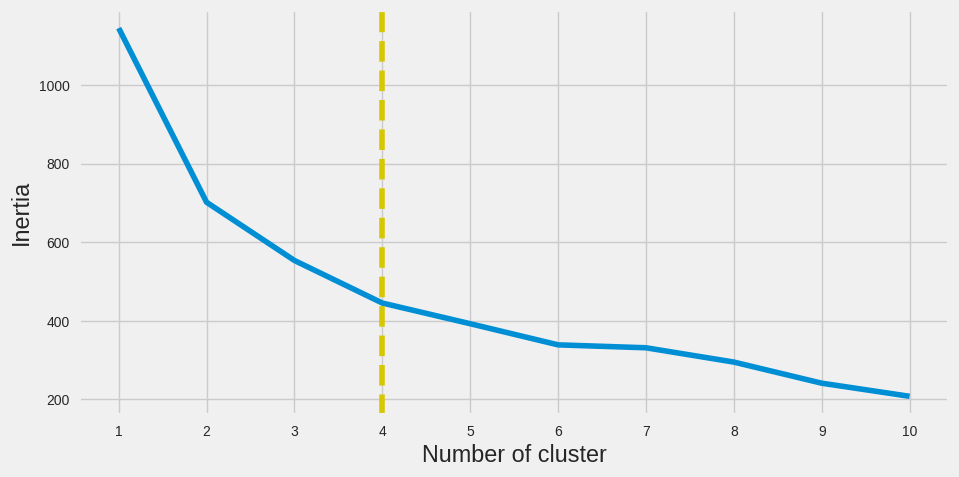

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 5))
plt.plot(range(1, 11), mbInertias)
plt.xticks(range(1, 11))
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.axvline(x=k2.elbow, color='y', label="anxline - full height", ls='--')
plt.show()

Silhouette coefficient

In [ ]:
silhouette_coefficients = []
for k in range(2, 11):
    mbKmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    mbKmeans.fit(df_pca)
    score = silhouette_score(scaled_dataframe, mbKmeans.labels_)
    silhouette_coefficients.append(score)

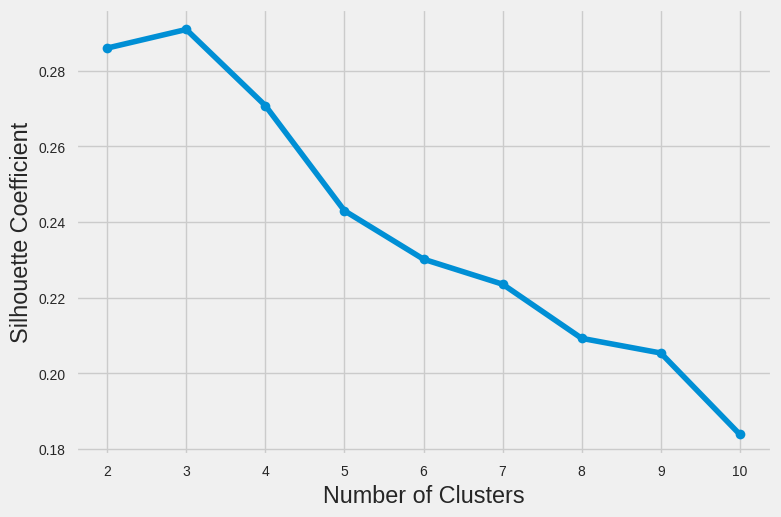

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients, marker='o')
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

* The best value of k using this method is equal to three.

Calinski-Harabasz Index

In [ ]:
calinski_harabaz_index = []
for k in range(2, 11):
    mbKmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    mbKmeans.fit(df_pca)
    score = calinski_harabasz_score(df_pca, mbKmeans.labels_)
    calinski_harabaz_index.append(score)

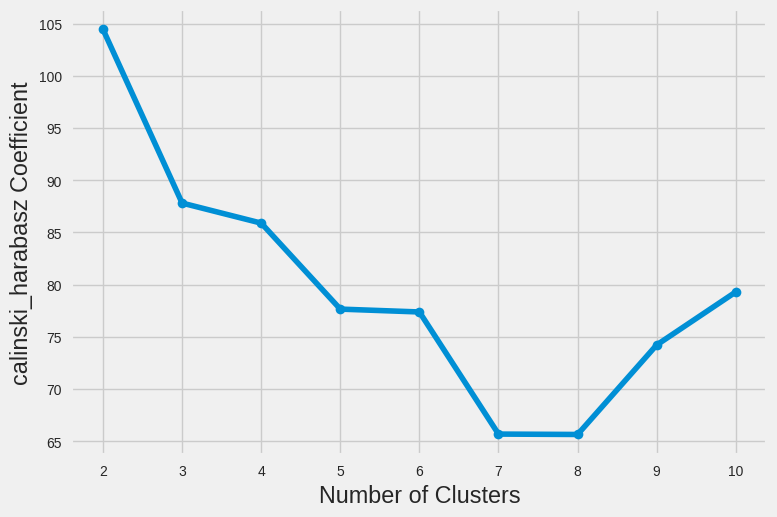

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), calinski_harabaz_index, marker='o')
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz Coefficient")
plt.show()

* The best value of k using this method is equal to three.

__According to the results, we consider the number of clusters equal to three.__

__Prediction2__

In [ ]:

mbkmeans = MiniBatchKMeans(n_clusters=3, random_state=42)         # Implement MiniBatchKmeans for n_clusters=3
mbkmeans.fit(df_pca)
pred2 = mbkmeans.labels_                                          # Store the cluster labels assigned by mini batch kmeans.
mbCentroids = mbkmeans.cluster_centers_                           # centroids holds the center points of the clusters.
mbCentroidsDf = pd.DataFrame(mbCentroids, columns=df_pca.columns)     # Save the result in the dataframe.
mbCentroidsDf.T

0         1         2
PC1  1.145903 -1.954356  4.401036
PC2 -0.428507  0.234853  4.257960
PC3 -0.047076  0.104135 -0.074069

In [ ]:
df_pca_copy['MiniBatch_pred'] = pred2
df_pca_copy

PC1       PC2       PC3  KMeans_pred  MiniBatch_pred
0   -2.913025  0.095621 -0.718118            1               1
1    0.429911 -0.588156 -0.333486            2               0
2   -0.285225 -0.455174  1.221505            1               0
3   -2.932423  1.695555  1.525044            1               1
4    1.033576  0.136659 -0.225721            2               0
..        ...       ...       ...          ...             ...
162 -0.820631  0.639570 -0.389923            1               1
163 -0.551036 -1.233886  3.101350            1               1
164  0.498524  1.390744 -0.238526            2               0
165 -1.887451 -0.109453  1.109752            1               1
166 -2.864064  0.485998  0.223167            1               1

[167 rows x 5 columns]

__Performance2__

In [ ]:
mb_silhoutteScore, mb_calinskiScore, mb_dunnIndex = performance(df_pca, mbKmeans.labels_)
print('mb_silhoutteScore', mb_silhoutteScore)
print('mb_calinskiScore', mb_calinskiScore)
print('mb_dunnIndex', mb_dunnIndex)

mb_silhoutteScore 0.269033764158341
mb_calinskiScore 79.3010458013728
mb_dunnIndex 0.9169980892570297


__Visualization2__

In [ ]:
df_count = pd.DataFrame({'Cluster':df_pca_copy['MiniBatch_pred'].value_counts().index, 'Count':df_pca_copy['MiniBatch_pred'].value_counts().values})
plt = px.pie(df_count, values='Count', names='Cluster', title='Percent of each clusters in dataset', color_discrete_sequence=px.colors.sequential.Purp_r)
plt.show()

* Most of the data belong to cluster number zero.

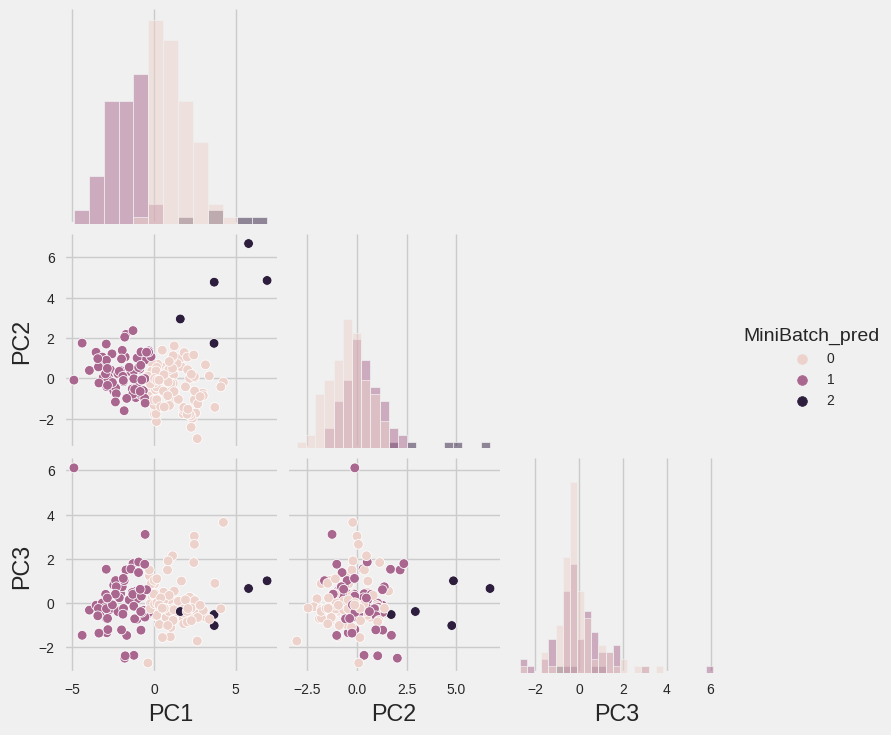

In [ ]:
sns.pairplot(df_pca_copy[df_pca_copy.drop(columns='KMeans_pred', axis=1).columns], hue='MiniBatch_pred', corner=True, diag_kind="hist")

* This plot give a good view of the data distribution according to their labels.

## <h4 style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#50508B; font-size:110%; text-align:left;padding: 10px; border-bottom: 2px solid #00003B">3.Gaussian Mixture Model (GMM)</h4>

<div style="border-radius:10px; border:#00003B solid; padding: 15px; background-color:#CCCCFF; font-size:100%; text-align:left">
    
A Gaussian Mixture Model (GMM) is a probabilistic model used for modeling data that can be thought of as a mixture of several Gaussian (normal) distributions. GMMs are particularly useful for tasks like clustering, density estimation, and data generation.
    
__how a Gaussian Mixture Model works:__
    
* __Initialization:__ The first step in using a GMM is to initialize the model. This typically involves selecting the number of components (Gaussians) in the mixture and initializing their parameters. The parameters include the means, variances (or covariances), and the mixing coefficients (weights) for each Gaussian component. These parameters can be initialized randomly or using some other heuristic.

* __Expectation-Maximization (EM) Algorithm:__

Expectation (E-step): In this step, for each data point, you calculate the probability that it belongs to each of the Gaussian components. This is done using Bayes' theorem and is known as the responsibility or posterior probability. Essentially, you compute how likely each component is responsible for generating each data point.

Maximization (M-step): In this step, you update the parameters (mean, variance, and mixing coefficients) of each Gaussian component based on the responsibilities calculated in the E-step. This step involves maximizing the likelihood of the data under the current model. The formulas for updating these parameters can be derived using maximum likelihood estimation.

* __Iteration:__ Steps 2 (E-step and M-step) are repeated iteratively until convergence criteria are met. Common convergence criteria include a maximum number of iterations, a small change in likelihood, or a small change in the model parameters.

* __Final Model:__ Once the GMM has converged, you have a final model with parameters that best represent the underlying data distribution as a mixture of Gaussian components.

__Using the GMM:__

Clustering: You can use the GMM to assign each data point to one of the Gaussian components based on the highest responsibility. This can be used for clustering the data.
Density Estimation: GMMs can be used to estimate the probability density function of the data. This can be useful for anomaly detection and generating new data points that follow a similar distribution.
Data Generation: Once trained, you can generate new data points from the GMM. To do this, you sample from the mixing coefficients to choose a component and then sample from the chosen Gaussian component to generate a data point.

__Finding the best parameters:__

<div style="border-radius:10px; border:#00003B solid; padding: 15px; background-color:#CCCCFF; font-size:100%; text-align:left">
    
<h3 align="left"><font color='#00003B'>📚 About the parameters</font></h3>
    
    
__covariance_type:__
    
* __Full:__ means the components may independently adopt any position and shape.

* __Tied:__ means they have the same shape, but the shape may be anything.

* __Diagonal:__ means the contour axes are oriented along the coordinate axes, but otherwise the eccentricities may vary between components.

* __Tied Diagonal:__ is a "tied" situation where the contour axes are oriented along the coordinate axes.

* __Spherical:__ is a "diagonal" situation with circular contours.
    

    
__init_params:__
    
The init_params parameter can take one of the following values:

* __kmeans:__ This is the default value. When set to 'kmeans', the algorithm initializes the means of the Gaussian components using the K-means clustering algorithm. K-means is run on the input data, and the cluster centers obtained from K-means are used as initial estimates for the GMM means. The covariances and mixing coefficients are initialized with some heuristics.

* __random:__ If set to 'random', the algorithm initializes all the parameters (means, covariances, and mixing coefficients) randomly. The random initialization provides a simple starting point for the Expectation-Maximization algorithm.

In [ ]:
# Define the parameter grid
param_grid = {
    'n_components': range(2, 11),                              # Try different values for the number of components
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],  # Different covariance types to try
    'init_params': ['kmeans', 'random']                        # Different initialization methods to try
}

# Create the GMM model
gmm = GaussianMixture(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(gmm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(df_pca)

# Get the best model and its parameters
best_gmm = grid_search.best_estimator_
best_params = grid_search.best_params_

In [ ]:
print('Best parameters: ', best_params)

Best parameters:  {'covariance_type': 'diag', 'init_params': 'random', 'n_components': 4}


Silhouette coefficient

In [ ]:
silhouette_coefficients = []
for n in range(2,11) :
    gmm = GaussianMixture(n_components=n, random_state=42, covariance_type='diag', init_params='random')
    gmm.fit(df_pca)
    score = silhouette_score(df_pca, gmm.predict(df_pca))
    silhouette_coefficients.append(score)

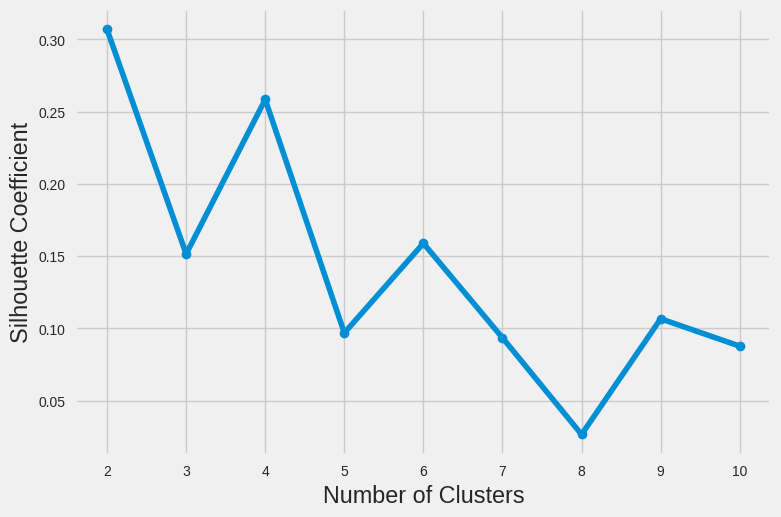

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients, marker='o')
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

* The best value of n_components using this method is equal to 4.

> Calinski-Harabasz Index

In [ ]:
calinski_harabasz_coef = []
for n in range(2,11):
    gmm = GaussianMixture(n_components=n, random_state=42, covariance_type='diag', init_params='random')
    gmm.fit(df_pca)
    score = calinski_harabasz_score(df_pca, gmm.predict(df_pca))
    calinski_harabasz_coef.append(score)

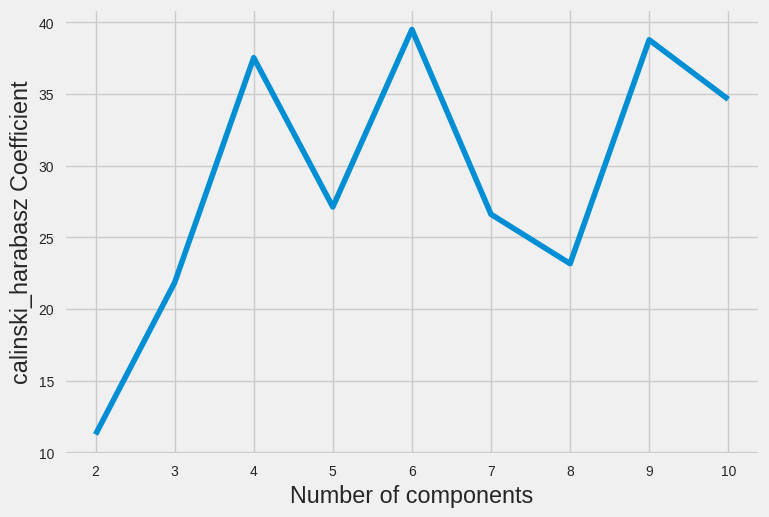

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), calinski_harabasz_coef)
plt.xticks(range(2, 11))
plt.xlabel("Number of components")
plt.ylabel("calinski_harabasz Coefficient")
plt.show()

* The best value of n_components using this method is equal to 4.

__According to the results, we consider the number of component equal to 4.__


__Prediction3__

In [ ]:
gmm = GaussianMixture(n_components=4, random_state=42, covariance_type='diag', init_params='random')
gmm.fit(df_pca)
print('means: ', gmm.means_)                         # Cluster means
print('covariances: ', gmm.covariances_)             # Covariance matrices
print('weights: ', gmm.weights_)                     # Mixing coefficients
pred3 = gmm.predict(df_pca)                # Assign data points to clusters

means:  [[-1.25595037 -0.01467402  0.02129659]
 [-0.30704544  0.31960197  0.61209002]
 [ 1.33320627 -0.40162511 -0.36303991]
 [ 4.44120111  2.82323228 -0.10049974]]
covariances:  [[ 1.89869912  0.58152737  0.59153205]
 [ 4.63856275  1.11218598  3.72339562]
 [ 1.25535038  1.14468353  0.0948062 ]
 [ 2.97331097 12.5520192   1.144059  ]]
weights:  [0.42582312 0.19652481 0.34815825 0.02949382]


In [ ]:
df_pca_copy['GMM_pred'] = pred3
df_pca_copy

PC1       PC2       PC3  KMeans_pred  MiniBatch_pred  GMM_pred
0   -2.913025  0.095621 -0.718118            1               1         0
1    0.429911 -0.588156 -0.333486            2               0         2
2   -0.285225 -0.455174  1.221505            1               0         0
3   -2.932423  1.695555  1.525044            1               1         1
4    1.033576  0.136659 -0.225721            2               0         2
..        ...       ...       ...          ...             ...       ...
162 -0.820631  0.639570 -0.389923            1               1         0
163 -0.551036 -1.233886  3.101350            1               1         1
164  0.498524  1.390744 -0.238526            2               0         2
165 -1.887451 -0.109453  1.109752            1               1         0
166 -2.864064  0.485998  0.223167            1               1         0

[167 rows x 6 columns]

__Performance3__

In [ ]:
gmm_silhoutteScore, gmm_calinskiScore, gmm_dunnIndex = performance(df_pca, pred3)
print('gmm_silhoutteScore', gmm_silhoutteScore)
print('gmm_calinskiScore', gmm_calinskiScore)
print('gmm_dunnIndex', gmm_dunnIndex)

gmm_silhoutteScore 0.2583842619882279
gmm_calinskiScore 37.53077040682729
gmm_dunnIndex 2.077136497878331


__Visualization3__

In [ ]:
df_count = pd.DataFrame({'Cluster':df_pca_copy['GMM_pred'].value_counts().index, 'Count':df_pca_copy['GMM_pred'].value_counts().values})
plt = px.pie(df_count, values='Count', names='Cluster', title='Percent of each clusters in dataset', color_discrete_sequence=px.colors.sequential.Purp_r)
plt.show()

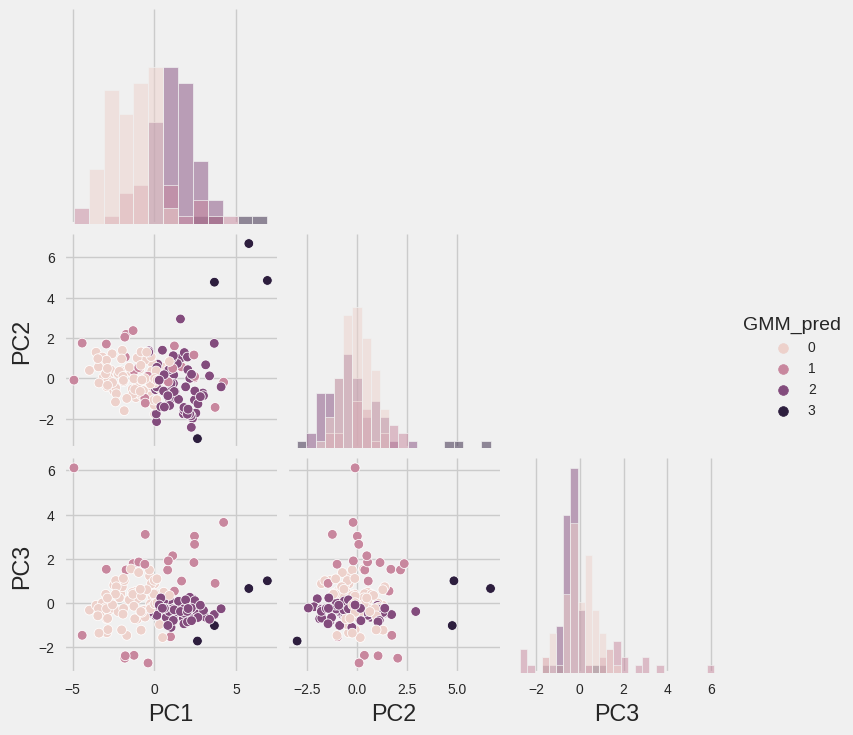

In [ ]:
sns.pairplot(df_pca_copy[df_pca_copy.drop(columns=['KMeans_pred', 'MiniBatch_pred'], axis=1).columns], hue='GMM_pred', corner=True, diag_kind="hist")

* This plot give a good view of the data distribution according to their labels.

## <h4 style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#50508B; font-size:110%; text-align:left;padding: 10px; border-bottom: 2px solid #00003B">4.DBSCAN</h4>

<div style="border-radius:10px; border:#00003B solid; padding: 15px; background-color:#CCCCFF; font-size:100%; text-align:left">
    
It is particularly effective in identifying clusters of data points in a dataset based on their density. DBSCAN does not require specifying the number of clusters beforehand, making it a versatile and useful technique.

__Here's how DBSCAN works:__

__Density-based clustering:__ DBSCAN operates by identifying "dense" regions in the data space and groups data points that are close to each other into clusters. It defines two important parameters:

a. Epsilon (ε): This is the radius that defines the neighborhood around each data point. It is used to determine which points are considered neighbors of each other.

b. MinPts: This is the minimum number of points required to form a dense region (cluster). If a data point has at least MinPts neighbors within a distance of ε, then it is considered a core point.

__Core points:__ DBSCAN starts by randomly selecting a data point in the dataset. It then checks whether this point has at least MinPts neighboring data points within a distance of ε. If it does, the point is marked as a core point and forms the basis of a new cluster.

__Expanding the cluster:__ Once a core point is identified, DBSCAN expands the cluster by finding all its neighbors within the ε distance. If a neighbor is also a core point, its neighbors are examined, and this process continues, creating a cluster of connected core points.

__Border points:__ If a data point does not have enough neighbors to be a core point but falls within the ε distance of another core point, it is considered a border point. Border points do not create new clusters but are assigned to the cluster of the core point they are close to.

__Noise points:__Any data point that does not belong to any cluster and is not a border point is considered a noise point. These points are usually outliers in the dataset.

The DBSCAN algorithm continues this process of finding core points, expanding clusters, and assigning border and noise points until all data points are examined. The result is a set of clusters, each formed by densely connected data points, and some data points labeled as noise.

DBSCAN has some key advantages, such as its ability to handle clusters of different shapes and sizes, robustness to noise, and not requiring a predefined number of clusters. However, it may struggle with datasets of varying densities, and the parameter tuning for ε and MinPts can sometimes be challenging.

__Finding the optimal parameters (ε and MinPts):__


In [ ]:
# Generate 20 equally spaced values between 0.1 and 2.0 (inclusive).
eps_values = np.linspace(0.1, 2.0, 20)

# Range of values for the minimum number of samples.
min_samples_values = range(3, 10)

# Initialize variables to store the best hyperparameters and score.
best_eps = None
best_min_samples = None
best_score = -1

# Loop over different values of epsilon and min_samples.
for eps in eps_values:
    for min_samples in min_samples_values:
        # Create a DBSCAN clustering model with the current parameters.
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)

        # Fit the model to the data.
        dbscan.fit(df_pca)

        # Get cluster labels assigned by DBSCAN.
        labels = dbscan.labels_

        # Check if there are more than one cluster (at least one noise cluster and one valid cluster).
        if len(np.unique(labels)) > 1:
            # Calculate the silhouette score, a measure of clustering quality.
            score = silhouette_score(df_pca, labels)

            # Update the best score and hyperparameters if the current score is higher.
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

# Print the optimal hyperparameters and score.
print(f"Optimal Epsilon: {best_eps}")
print(f"Optimal MinPts: {best_min_samples}")

Optimal Epsilon: 2.0
Optimal MinPts: 3


__Prediction4__

In [ ]:
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(df_pca)
pred4 = dbscan.labels_                                          # Store the cluster labels assigned by DBSCAN.

In [ ]:
df_pca_copy['DBSCAN_pred'] = pred4
df_pca_copy                                       # Store the cluster labels assigned by DBSCAN.

PC1       PC2       PC3  KMeans_pred  MiniBatch_pred  GMM_pred  \
0   -2.913025  0.095621 -0.718118            1               1         0   
1    0.429911 -0.588156 -0.333486            2               0         2   
2   -0.285225 -0.455174  1.221505            1               0         0   
3   -2.932423  1.695555  1.525044            1               1         1   
4    1.033576  0.136659 -0.225721            2               0         2   
..        ...       ...       ...          ...             ...       ...   
162 -0.820631  0.639570 -0.389923            1               1         0   
163 -0.551036 -1.233886  3.101350            1               1         1   
164  0.498524  1.390744 -0.238526            2               0         2   
165 -1.887451 -0.109453  1.109752            1               1         0   
166 -2.864064  0.485998  0.223167            1               1         0   

     DBSCAN_pred  
0              0  
1              0  
2              0  
3              0  
4              0  
..           ...  
162            0  
163            0  
164            0  
165            0  
166            0  

[167 rows x 7 columns]

__Performance4__

In [ ]:
db_silhoutteScore, db_calinskiScore, db_dunnIndex = performance(df_pca, dbscan.labels_)
print('db_silhoutteScore', db_silhoutteScore)
print('db_calinskiScore', db_calinskiScore)
print('db_dunnIndex', db_dunnIndex)

db_silhoutteScore 0.6178129161645167
db_calinskiScore 18.00493528371049
db_dunnIndex 1.3695431201037487


__Visualization4__

In [ ]:
df_count = pd.DataFrame({'Cluster':df_pca_copy['DBSCAN_pred'].value_counts().index, 'Count':df_pca_copy['DBSCAN_pred'].value_counts().values})
plt = px.pie(df_count, values='Count', names='Cluster', title='Percent of each clusters in dataset', color_discrete_sequence=px.colors.sequential.Purp_r)
plt.show()

* Most of the data belong to cluster number zero.

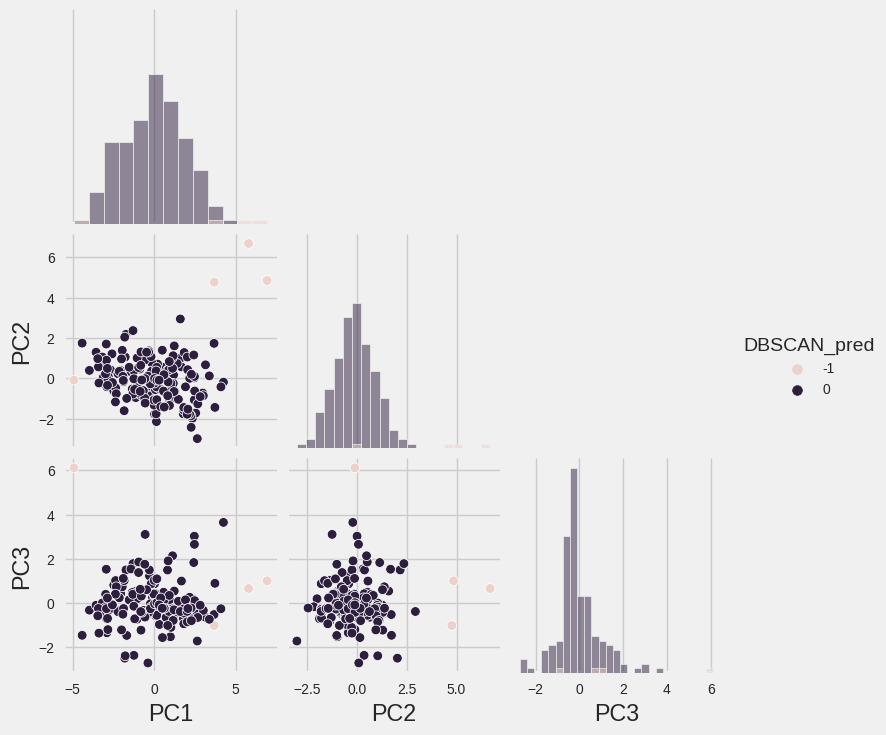

In [ ]:
sns.pairplot(df_pca_copy[df_pca_copy.drop(columns=['KMeans_pred', 'MiniBatch_pred', 'GMM_pred'], axis=1).columns], hue='DBSCAN_pred', corner=True, diag_kind="hist")

* This plot give a good view of the data distribution according to their labels.


## <h4 style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#50508B; font-size:110%; text-align:left;padding: 10px; border-bottom: 2px solid #00003B">5.Hierarchical</h4>

<div style="border-radius:10px; border:#00003B solid; padding: 15px; background-color:#CCCCFF; font-size:100%; text-align:left">
    
There are two main types of hierarchical clustering: agglomerative and divisive. I'll explain the agglomerative approach, which is more commonly used:

__Agglomerative Hierarchical Clustering:__

* __Initialization:__ Each data point starts as its own individual cluster.

* __Similarity Calculation:__ The algorithm calculates the similarity or dissimilarity between each pair of data points. Common distance metrics such as Euclidean distance or cosine similarity are often used.

* __Merge Closest Clusters:__ The two closest clusters based on the chosen similarity metric are merged to form a new, larger cluster. The distance between clusters is determined by the linkage criterion. There are different linkage criteria used, including single linkage, complete linkage, and average linkage, among others.

Single Linkage: The distance between two clusters is defined by the shortest distance between any two points in the two clusters.

Complete Linkage: The distance between two clusters is defined by the longest distance between any two points in the two clusters.

Average Linkage: The distance between two clusters is defined by the average distance between all pairs of points in the two clusters.

* __Update Similarity Matrix:__ After merging clusters, the similarity matrix is updated to reflect the distances between the new cluster and the remaining individual clusters.

Repeat: Steps 3 and 4 are repeated until all data points belong to a single cluster or a predefined number of clusters is reached.

Dendrogram: During the process, a dendrogram is created, which is a tree-like structure that visually represents the hierarchical clustering process. The height at which two clusters are merged in the dendrogram represents their distance or dissimilarity.

Cluster Selection: The desired number of clusters is chosen by cutting the dendrogram at a specific height or by using another method, such as the Elbow method or Silhouette analysis, to determine the optimal number of clusters.

Hierarchical clustering is flexible and does not require specifying the number of clusters beforehand, making it useful for exploratory data analysis. However, it can be computationally expensive for large datasets, and the choice of linkage criteria can significantly impact the final clustering result.

__Prediction5__

In [ ]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=3, linkage='average')
hierarchical_clustering.fit(df_pca)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [ ]:
# Store result of Agglomerative
pred5 = hierarchical_clustering.labels_
df_pca_copy['Hierarchical_pred'] = pred5
df_pca_copy

PC1       PC2       PC3  KMeans_pred  MiniBatch_pred  GMM_pred  \
0   -2.913025  0.095621 -0.718118            1               1         0   
1    0.429911 -0.588156 -0.333486            2               0         2   
2   -0.285225 -0.455174  1.221505            1               0         0   
3   -2.932423  1.695555  1.525044            1               1         1   
4    1.033576  0.136659 -0.225721            2               0         2   
..        ...       ...       ...          ...             ...       ...   
162 -0.820631  0.639570 -0.389923            1               1         0   
163 -0.551036 -1.233886  3.101350            1               1         1   
164  0.498524  1.390744 -0.238526            2               0         2   
165 -1.887451 -0.109453  1.109752            1               1         0   
166 -2.864064  0.485998  0.223167            1               1         0   

     DBSCAN_pred  Hierarchical_pred  
0              0                  0  
1              0                  0  
2              0                  0  
3              0                  0  
4              0                  0  
..           ...                ...  
162            0                  0  
163            0                  0  
164            0                  0  
165            0                  0  
166            0                  0  

[167 rows x 8 columns]

__Performance5__

In [ ]:
h_silhoutteScore, h_calinskiScore, h_dunnIndex = performance(df_pca, hierarchical_clustering.labels_)
print('h_silhoutteScore', h_silhoutteScore)
print('h_calinskiScore', h_calinskiScore)
print('h_dunnIndex', h_dunnIndex)

h_silhoutteScore 0.5347577307982272
h_calinskiScore 21.57980923984847
h_dunnIndex 0.5385243630123681


__Visualization5__

In [ ]:
df_count = pd.DataFrame({'Cluster':df_pca_copy['Hierarchical_pred'].value_counts().index, 'Count':df_pca_copy['Hierarchical_pred'].value_counts().values})
plt = px.pie(df_count, values='Count', names='Cluster', title='Percent of each clusters in dataset', color_discrete_sequence=px.colors.sequential.Purp_r)
plt.show()

* Most of the data belong to cluster number zero.

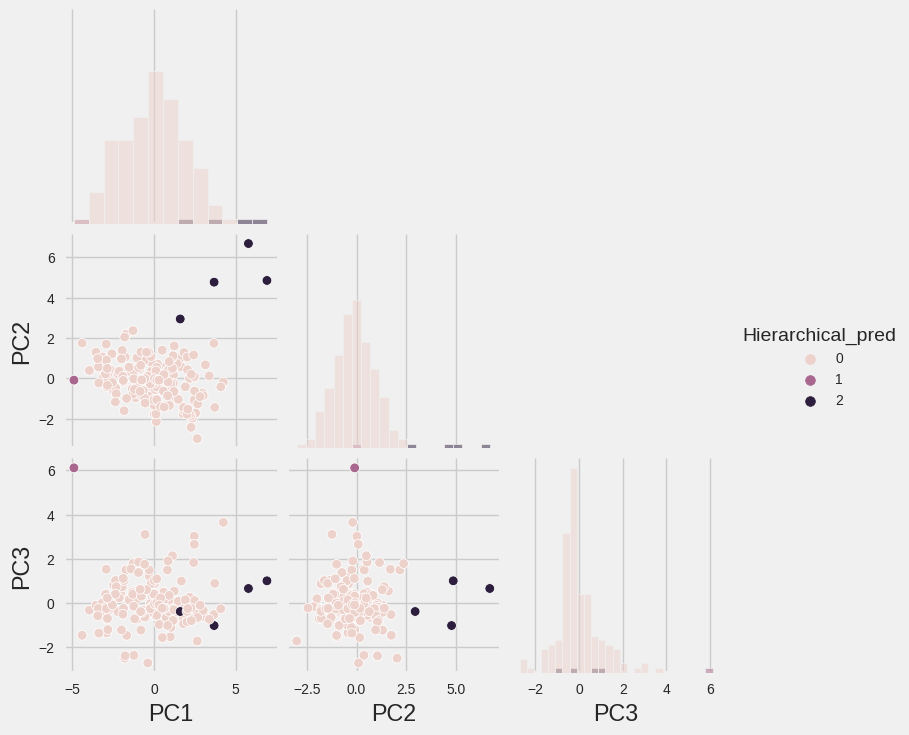

In [ ]:
sns.pairplot(df_pca_copy[df_pca_copy.drop(columns=['KMeans_pred', 'MiniBatch_pred', 'GMM_pred', 'DBSCAN_pred'], axis=1).columns], hue='Hierarchical_pred', corner=True, diag_kind="hist")

* This plot give a good view of the data distribution according to their labels.

In [ ]:
info1 = pd.DataFrame({'Model':['KMeans', 'Mini Batch KMeans', 'Gaussian Mixture Model (GMM)', 'DBSCAN', 'Hierarchical'],
                        'silhouette_score':[km_silhoutteScore, mb_silhoutteScore, gmm_silhoutteScore, db_silhoutteScore, h_silhoutteScore],
                        'calinski_harabasz_score':[km_calinskiScore, mb_calinskiScore, gmm_calinskiScore, db_calinskiScore, h_calinskiScore],
                        'davies_bouldin_score':[km_dunnIndex, mb_dunnIndex, gmm_dunnIndex, db_dunnIndex, h_dunnIndex]})
info1.style.highlight_max(color="yellow")

In [ ]:
def scatterPlot(df, feature1, feature2, feature3, pred_column):
    # Create a 1x3 grid of subplots for plotting the scatter plots side by side.
    fig , axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
    axs = axs.flatten()  # Flatten the 2D array of subplots into a 1D array.

    # Create the first scatter plot (feature1 vs. feature2).
    sns.scatterplot(data=df, x=df[feature1], y=df[feature2],
                    hue=pred_column, markers=True, legend='auto', ax=axs[0])

    # Create the second scatter plot (feature1 vs. feature3).
    sns.scatterplot(data=df, x=df[feature1], y=df[feature3],
                    hue=pred_column, markers=True, legend='auto', ax=axs[1])

    # Create the third scatter plot (feature2 vs. feature3).
    sns.scatterplot(data=df, x=df[feature2], y=df[feature3],
                    hue=pred_column, markers=True, legend='auto', ax=axs[2])

    # Adjust subplot layout for better spacing.
    plt.tight_layout()

    # Display the plots.
    plt.show()

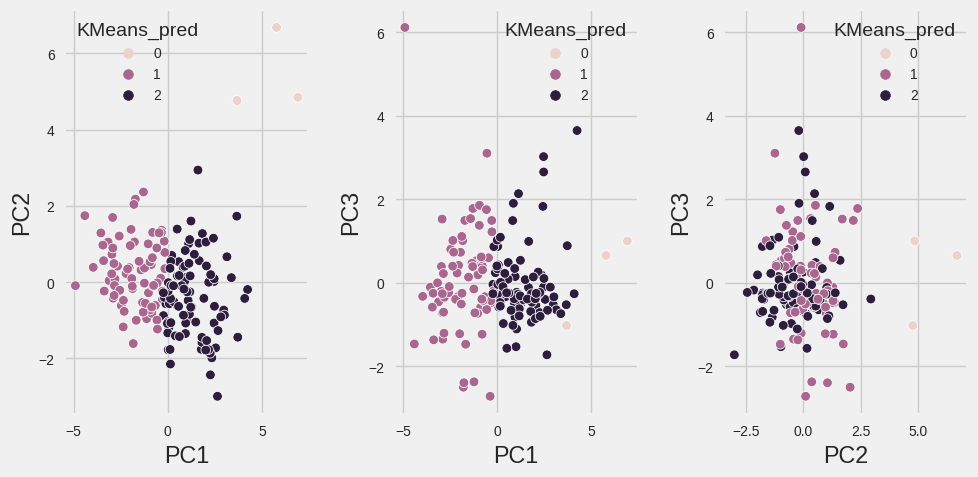

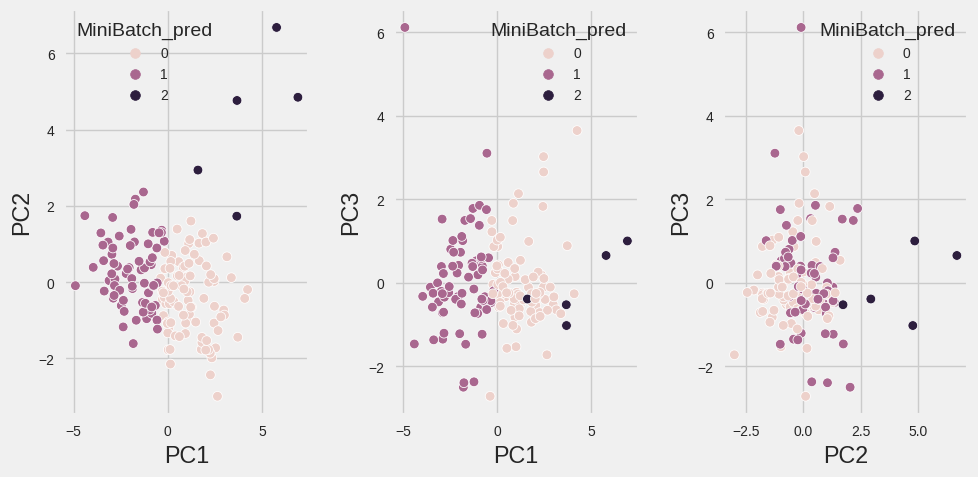

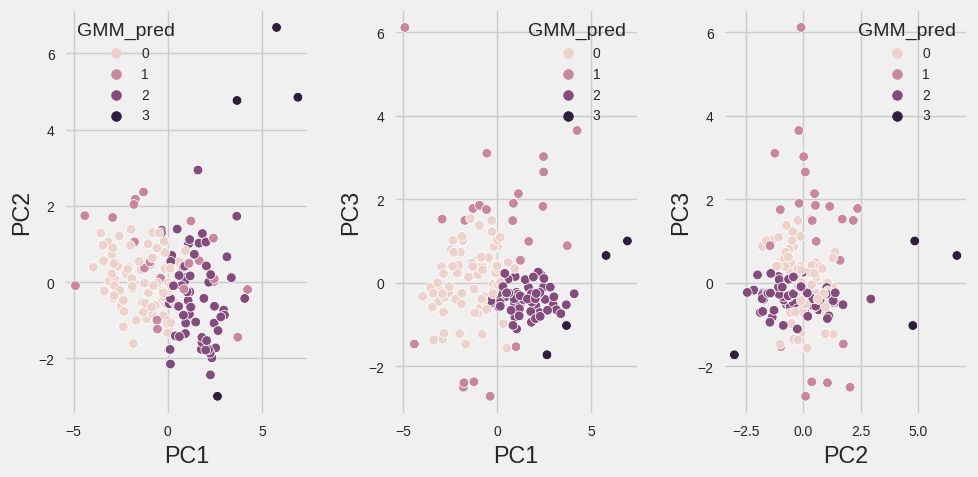

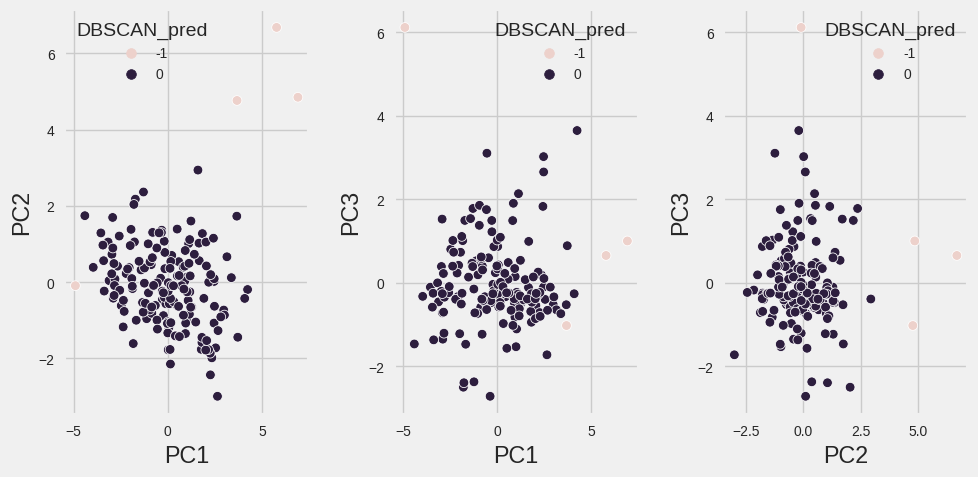

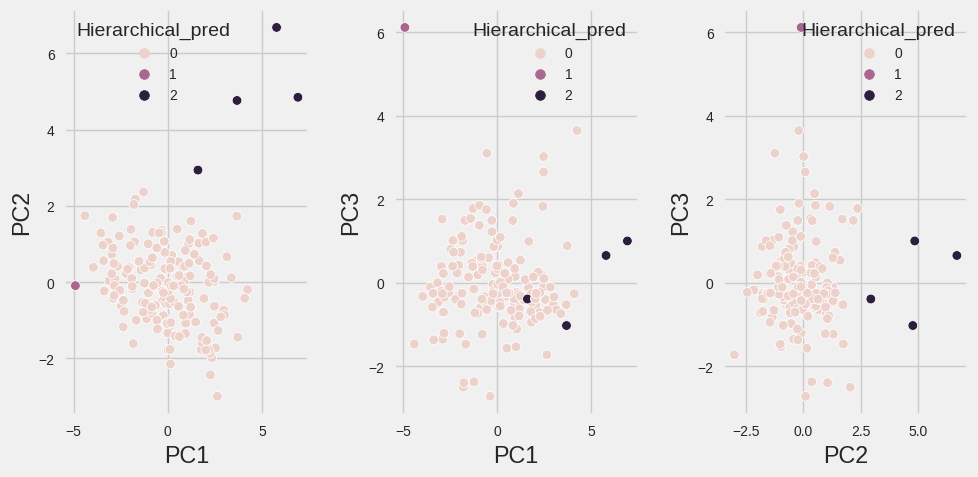

In [ ]:
import matplotlib.pyplot as plt
for column in ['KMeans_pred', 'MiniBatch_pred', 'GMM_pred', 'DBSCAN_pred', 'Hierarchical_pred']:
    scatterPlot(df_pca_copy, 'PC1', 'PC2', 'PC3', column)

In [ ]:
info2 = pd.DataFrame({'Model':['KMeans', 'Mini Batch KMeans', 'Gaussian Mixture Model (GMM)', 'DBSCAN', 'Hierarchical'],
                        'silhouette_score':[0.286833, 0.330786, 0.150078, 0.326303, 0.174947],
                        'calinski_harabasz_score':[88.209577, 75.593987, 29.346410, 3.698697, 2.936986],
                        'davies_bouldin_score':[1.203538, 0.861427, 1.536803, 2.350597, 0.535426]})
info2.style.highlight_max(color="yellow")

__As evident from the results, the K-means algorithm demonstrated superior data separation capabilities, achieving a commendable score in the process.__

If we remove outliers:

In [ ]:
info2 = pd.DataFrame({'Model':['KMeans', 'Mini Batch KMeans', 'Gaussian Mixture Model (GMM)', 'DBSCAN', 'Hierarchical'],
                        'silhouette_score':[0.286833, 0.330786, 0.150078, 0.326303, 0.174947],
                        'calinski_harabasz_score':[88.209577, 75.593987, 29.346410, 3.698697, 2.936986],
                        'davies_bouldin_score':[1.203538, 0.861427, 1.536803, 2.350597, 0.535426]})
info2.style.highlight_max(color="yellow")

<div style="border-radius:10px; border:#00003B solid; padding: 15px; background-color:#CCCCFF; font-size:100%; text-align:left">
   
<h3 align="left"><font color='#00003B'>📌 Result:</font></h3>

We decided to use the __kmeans__ algorithm and __not remove outliers.__

# <h4 style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#50508B; font-size:110%; text-align:left;padding: 10px; border-bottom: 2px solid #00003B">Let's choose the final model and analyze it</h4>

In [ ]:
labels = df_pca_copy['KMeans_pred']
df['Label'] = labels
df


country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  Label  
0         9.44        56.2       5.82    553      1  
1         4.49        76.3       1.65   4090      2  
2        16.10        76.5       2.89   4460      1  
3        22.40        60.1       6.16   3530      1  
4         1.44        76.8       2.13  12200      2  
..         ...         ...        ...    ...    ...  
162       2.62        63.0       3.50   2970      1  
163      45.90        75.4       2.47  13500      1  
164      12.10        73.1       1.95   1310      2  
165      23.60        67.5       4.67   1310      1  
166      14.00        52.0       5.40   1460      1  

[167 rows x 11 columns]

In [ ]:
dfL0 = df[df['Label']==0]
dfL1 = df[df['Label']==1]
dfL2 = df[df['Label']==2]

In [ ]:
dfL0

country  child_mort  exports  health  imports  income  inflation  \
91   Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
98        Malta         6.8    153.0    8.65    154.0   28300      3.830   
133   Singapore         2.8    200.0    3.96    174.0   72100     -0.046   

     life_expec  total_fer    gdpp  Label  
91         81.3       1.63  105000      0  
98         80.3       1.36   21100      0  
133        82.7       1.15   46600      0

In [ ]:
dfL1

country  child_mort  exports  health  imports  income  inflation  \
0    Afghanistan        90.2     10.0    7.58     44.9    1610      9.440   
2        Algeria        27.3     38.4    4.17     31.4   12900     16.100   
3         Angola       119.0     62.3    2.85     42.9    5900     22.400   
12    Bangladesh        49.4     16.0    3.52     21.8    2440      7.140   
17         Benin       111.0     23.8    4.10     37.2    1820      0.885   
..           ...         ...      ...     ...      ...     ...        ...   
161   Uzbekistan        36.3     31.7    5.81     28.5    4240     16.500   
162      Vanuatu        29.2     46.6    5.25     52.7    2950      2.620   
163    Venezuela        17.1     28.5    4.91     17.6   16500     45.900   
165        Yemen        56.3     30.0    5.18     34.4    4480     23.600   
166       Zambia        83.1     37.0    5.89     30.9    3280     14.000   

     life_expec  total_fer   gdpp  Label  
0          56.2       5.82    553      1  
2          76.5       2.89   4460      1  
3          60.1       6.16   3530      1  
12         70.4       2.33    758      1  
17         61.8       5.36    758      1  
..          ...        ...    ...    ...  
161        68.8       2.34   1380      1  
162        63.0       3.50   2970      1  
163        75.4       2.47  13500      1  
165        67.5       4.67   1310      1  
166        52.0       5.40   1460      1  

[75 rows x 11 columns]

In [ ]:
dfL2

country  child_mort  exports  health  imports  income  \
1                 Albania        16.6     28.0    6.55     48.6    9930   
4     Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
5               Argentina        14.5     18.9    8.10     16.0   18700   
6                 Armenia        18.1     20.8    4.40     45.3    6700   
7               Australia         4.8     19.8    8.73     20.9   41400   
..                    ...         ...      ...     ...      ...     ...   
157  United Arab Emirates         8.6     77.7    3.66     63.6   57600   
158        United Kingdom         5.2     28.2    9.64     30.8   36200   
159         United States         7.3     12.4   17.90     15.8   49400   
160               Uruguay        10.6     26.3    8.35     25.4   17100   
164               Vietnam        23.3     72.0    6.84     80.2    4490   

     inflation  life_expec  total_fer   gdpp  Label  
1         4.49        76.3       1.65   4090      2  
4         1.44        76.8       2.13  12200      2  
5        20.90        75.8       2.37  10300      2  
6         7.77        73.3       1.69   3220      2  
7         1.16        82.0       1.93  51900      2  
..         ...         ...        ...    ...    ...  
157      12.50        76.5       1.87  35000      2  
158       1.57        80.3       1.92  38900      2  
159       1.22        78.7       1.93  48400      2  
160       4.91        76.4       2.08  11900      2  
164      12.10        73.1       1.95   1310      2  

[89 rows x 11 columns]

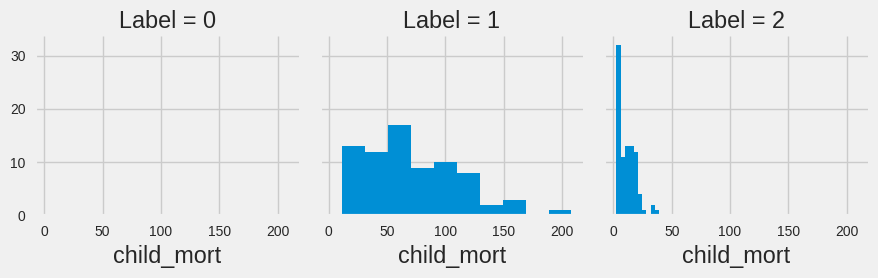

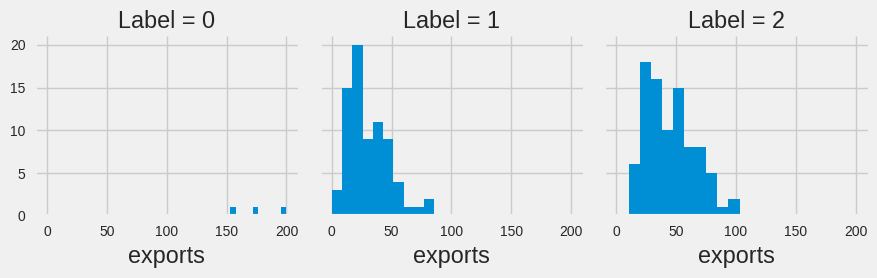

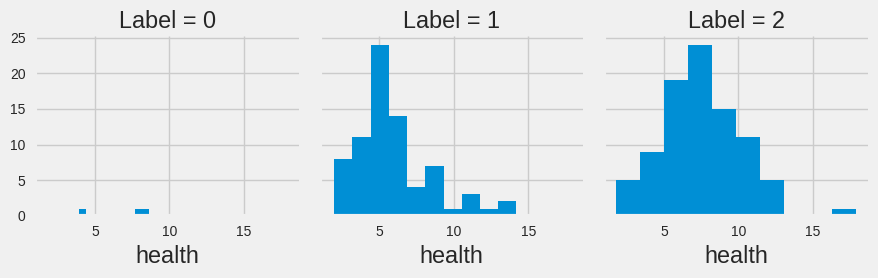

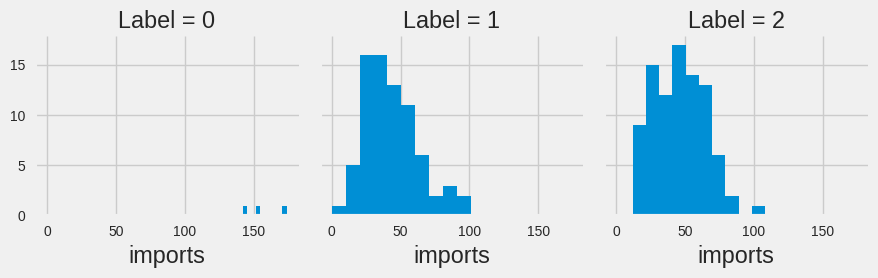

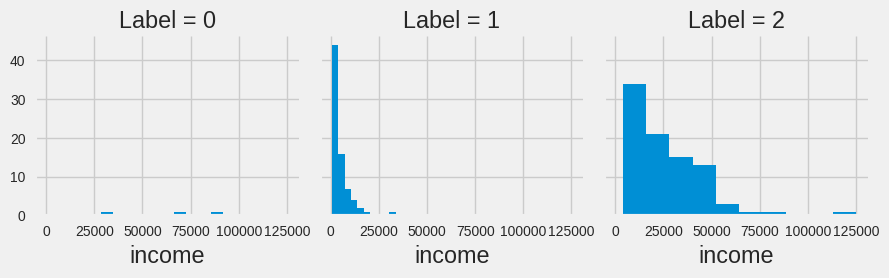

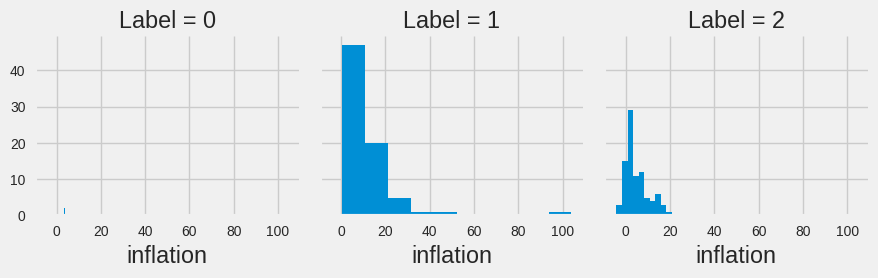

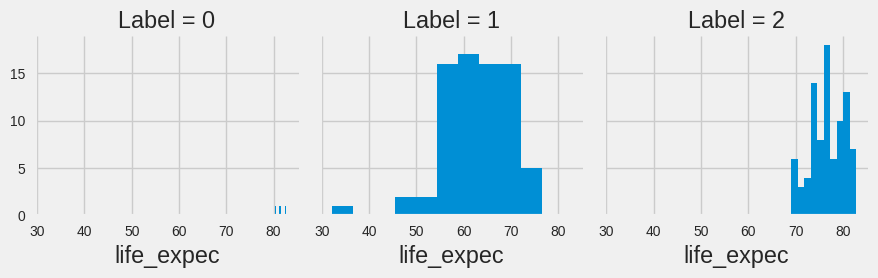

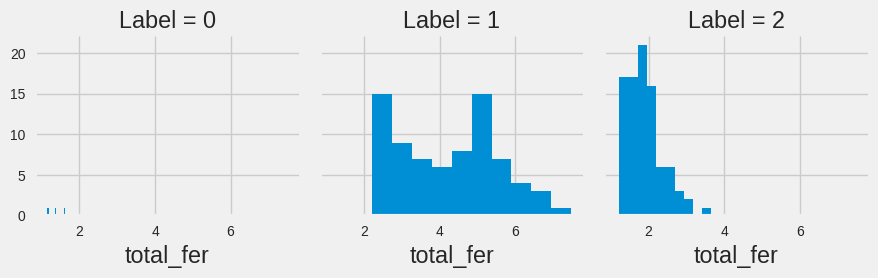

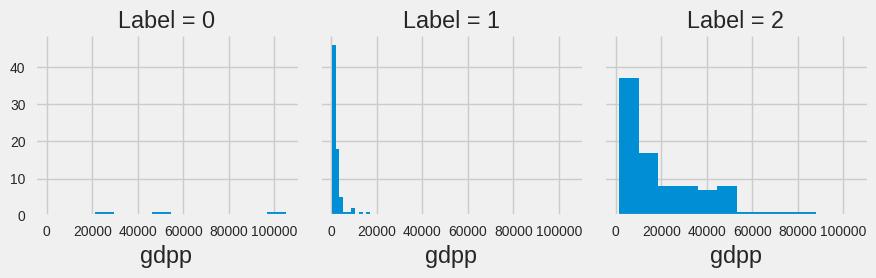

In [ ]:
import matplotlib.pyplot as plt
for column in df.drop(columns=['Label', 'country']):
    ax = sns.FacetGrid(df, col='Label')
    ax.map(plt.hist, column)

In [ ]:
fig = px.choropleth(df,
                    locationmode='country names',
                    locations='country',
                    color='Label',
                    title='Countries based on their clusters',
                    color_continuous_scale='thermal'
                   )

fig.show()

* __Countries with a label equal to one need more help.__

* __These regions mainly include African countries.__

__Let's see the list of these countries:__

In [ ]:
dfn = df[df['Label'] == 1]
dfn.country

0      Afghanistan
2          Algeria
3           Angola
12      Bangladesh
17           Benin
          ...     
161     Uzbekistan
162        Vanuatu
163      Venezuela
165          Yemen
166         Zambia
Name: country, Length: 75, dtype: object

In [ ]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.7/718.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-7.0.0-py3-none-any.whl size=21129 sha256=510fda11b50d1af890e1bb8a6bd808fe24e01827ed6bc9479258192cd0a2ff09
  Stored in directory: /root/.cache/pip/wheels/60/29/7b/f64332aa7e5e88fbd56d4002185ae22dcdc83b35b3d1c2cbf5
Successfully built pyngrok


In [ ]:
# Save your Streamlit app code in a .py file
with open('streamlit_app.py', 'w') as f:
    f.write("""
import streamlit as st

def main():
    st.title("Country data Streamlit App")
    # Add your Streamlit app code here

if __name__ == "__main__":
    main()
    """)


In [ ]:
!streamlit run streamlit_app.py &

# Ngrok setup to expose your local server to the internet
from pyngrok import ngrok






  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://104.196.208.15:8501

  Stopping...
